## 1. INTRODUÇÃO

<a id="11"></a>
### 1.1. Contextualização do problema de fraudes

A prevenção e detecção de fraudes é de extrema importância para organizações dos mais diversos setores. Segundo Van Vlasselaer *et al*. (2017), “fraude é um crime incomum, bem planejado, cuidadosamente ocultado, que evolui ao longo do tempo e frequentemente é organizado de forma meticulosa, manifestando-se de diversas maneiras”. Em termos simples, trata-se do ato de enganar alguém com o objetivo de obter bens ou dinheiro de forma ilícita. Por isso, empresas buscam continuamente bloquear, controlar e prevenir transações fraudulentas, visando mitigar perdas financeiras e proteger sua integridade operacional.

<a id="12"></a>
### 1.2. Objetivo do projeto

O objetivo deste projeto é identificar e analisar os principais fatores associados à ocorrência de transações fraudulentas, por meio de exploração estatística, com foco na construção de um perfil característico das fraudes.

Para isso, iremos:
* Analisar o comportamento dos principais KPIs de fraude ao longo do tempo;
* Investigar a relação entre o valor das transações e a ocorrência de fraude;
* Identificar as regiões geográficas com maior incidência de fraudes;
* Verificar a associação entre documentação incompleta e transações fraudulentas;
* Avaliar quais categorias de produtos estão mais associadas a fraudes.

<a id="13"></a>
### 1.3. Desafio analítico

Quais são os principais fatores associados à ocorrência de transações fraudulentas, e como eles podem ser utilizados para caracterizar o perfil das fraudes?

<a id="14"></a>
### 1.4. Hipoteses iniciais

* Transações com valores elevados apresentam maior probabilidade de serem fraudulentas;
* Transações originadas em regiões geográficas incomuns estão mais propensas à fraude
* Transações associadas a documentação incompleta apresentam maior chance de serem fraudulentas;
* Algumas categorias de produtos são desproporcionalmente associadas a transações fraudulentas.

<a id="15"></a>
### 1.5. Estrutura do projeto

Nas [seções 2.](#2) e [3.](#3), são apresentados, respectivamente, os *imports* das bibliotecas utilizadas e o carregamento do conjunto de dados analisado.
Na [seção 4.](#4), realiza-se a análise de determinados KPIs de fraude, com o objetivo de avaliar a performance do negócio.
Em seguida, na [seção 5.](#5), é feita a análise exploratória de dados (*EDA*), voltada para o exame e a caracterização do conjunto de dados.
Na [seção 6.](#6), são conduzidos testes de hipóteses com o propósito de verificar se as hipóteses formuladas inicialmente são consistentes com os dados observados.
Por fim, a [seção 7.](#7) apresenta as considerações finais, com uma síntese dos principais achados, observações sobre a análise e sugestões para estudos futuros.

<a id="2"></a>
## 2. IMPORTS

In [65]:
import sys
sys.path.append("/home/mcastro/Documents/visual_studio_code_files/case-fraude/src")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.stats.descriptivestats import Description
import testes as ts

from matplotlib import rcParams
rcParams["font.sans-serif"] = "Arial"
rcParams["font.family"] = "Arial"

pd.set_option("display.float_format", "{:.2f}".format)
np.set_printoptions(suppress=True, precision=2)

<a id="3"></a>
## 3. DADOS

<a id="31"></a>
### 3.1. Fonte dos dados

Os conjunto de dados foi obtido no PED (Preparatório para Entrevistas em Dados), da Prof.ª Renata Biaggi. Acesse: https://www.renatabiaggi.com/ped.

**Disclaimer**:
* Os dados utilizados representam apenas uma amostra do universo total de transações e, portanto, os valores absolutos de lucros e perdas não refletem os montantes reais da operação.

* Pressupõe-se que essa amostra é aleatória, não enviesada e suficientemente representativa do comportamento geral das variáveis e das relações entre elas, o que permite a realização de inferências exploratórias.

<a id="32"></a>
### 3.2. Carregamento dos dados

In [66]:
# Carregar os dados e mostrar as primeiras linhas
df = pd.read_csv(
    filepath_or_buffer="/home/mcastro/Documents/visual_studio_code_files/case-fraude/data/dados.csv",  # caminho do arquivo
    sep=",",  # separador
    header=0,  # linha do cabeçalho
    dtype={
        "pais": "category",
        "produto": "string",
        "categoria_produto": "category",
    },  # tipos de dados
    parse_dates=["data_compra"],  # coluna a ser convertida para datetime
    date_format="%Y-%m-%d %H:%M:%S",  # formato da data
)

# Exibir as primeiras linhas do DataFrame
df.head(3)

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.77,94436.24,20.00,0.44,1.00,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.88,240.00,102.00,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.76,9258.50,1.00,0.00,33.00,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.38,4008.00,0.00,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.75,242549.09,3.00,0.00,19.00,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.52,1779.00,77.00,1,NaN,N,2020-03-25 18:13:38,339.32,95,0


In [67]:
# Informações gerais
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   score_1              150000 non-null  int64         
 1   score_2              137016 non-null  float64       
 2   score_3              137016 non-null  float64       
 3   score_4              149635 non-null  float64       
 4   score_5              150000 non-null  float64       
 5   score_6              149989 non-null  float64       
 6   pais                 149806 non-null  category      
 7   score_7              150000 non-null  int64         
 8   produto              150000 non-null  string        
 9   categoria_produto    150000 non-null  category      
 10  score_8              150000 non-null  float64       
 11  score_9              149989 non-null  float64       
 12  score_10             149635 non-null  float64       
 13  entrega_doc_1 

In [68]:
# Manter somente data sem hora
df["data_compra"] = df["data_compra"].apply(lambda x: x.date())

In [69]:
# Quantidade de nulos em cada coluna
df.isnull().sum()

score_1                     0
score_2                 12984
score_3                 12984
score_4                   365
score_5                     0
score_6                    11
pais                      194
score_7                     0
produto                     0
categoria_produto           0
score_8                     0
score_9                    11
score_10                  365
entrega_doc_1               0
entrega_doc_2          108857
entrega_doc_3               0
data_compra                 0
valor_compra                0
score_fraude_modelo         0
fraude                      0
dtype: int64

In [70]:
# Verificando se há duplicados
df.duplicated().any()

np.False_

<a id="4"></a>
## 4. ANÁLISE DOS INDICADORES-CHAVE (KPIS)

<a id="41"></a>
### 4.1. Identificação dos principais KPIs

A definição dos KPIs parte do mapeamento dos *objetivos estratégicos* do negócio. Para isso, é importante compreender o propósito da organização, seu público-alvo, as operações envolvidas e a infraestrutura necessária — além de identificar riscos e desafios competitivos.

A partir dos objetivos estratégicos, elaboram-se as *KPQs (Key Performance Questions)* — perguntas que ajudam a avaliar se os objetivos estão sendo atingidos. Essa abordagem evita o foco em métricas irrelevantes e direciona a análise para indicadores que realmente refletem a performance do negócio.

Neste projeto, foram definidos os seguintes objetivos estratégicos para o e-commerce: *aumentar as receitas* e *maximizar o lucro*. Com base nisso, propuseram-se as seguintes KPQs:

- Até que ponto estamos aumentando nossas margens de lucro?
- Quão bem estamos identificando transações fraudulentas?
- Quão bem estamos prevenindo que transações fraudulentas ocorram?

Para responder a essas perguntas, foram selecionados os seguintes KPIs:

- **Taxa de fraude**
- **Taxa de fraude por categoria de produto**
- **Valor médio das fraudes**
- **Valor médio dos pedidos legítimos**
- **Receita com pedidos legítimos**
- **Fraudes por região**

Esses KPIs são úteis para caracterizar o perfil das fraudes e **não dependem de dados de recusa automática (auto-decline)** — que não estão disponíveis neste conjunto de dados.

<a id="42"></a>
### 4.2. Evolução diária das fraudes e seus efeitos no lucro

A taxa de fraudes representa a proporção de pedidos fraudulentos em relação ao total de pedidos realizados. Sua fórmula é dada por:

$$ \text{Taxa de fraude} = \frac{\text{Qtd. de pedidos fraudulentos}}{\text{Total de pedidos}} $$

Taxas de fraude elevadas podem comprometer significativamente os resultados financeiros da empresa, sendo, portanto, um indicador crítico a ser monitorado e mantido sob controle.

É importante ressaltar que o dataset não inclui informações sobre auto-declines — pedidos recusados automaticamente antes da finalização. Como esses pedidos não entram no total analisado, a taxa de fraudes pode estar artificialmente inflada. Essa limitação pode introduzir imprecisões na interpretação do indicador e deve ser considerada na análise.

<a id="421"></a>
#### 4.2.1. Obtenção dos dados diários

Utilizou-se a função `pivot_table()` do `pandas` para agrupar os dados por data de compra e tipo de transação (fraude ou não-fraude), com o cálculo do volume de pedidos, valor total e valor médio das compras.

Em seguida, foram calculados o volume e o valor total dos pedidos diários, a taxa de fraude, as receitas e o lucro obtido em cada dia.

Adicionalmente, foi calculada a média móvel de 3 dias para suavizar variações pontuais e facilitar a identificação de tendências de curto prazo.

In [71]:
# Agrupar por data e fraude, e calcular volume, valor total e valor médio
fraudes_df = pd.pivot_table(
    df,
    index="data_compra",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
)

# Limpar nomes das colunas
fraudes_df.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_df.columns.values
]
fraudes_df.reset_index(inplace=True)

# Renomear colunas
fraudes_df.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular volume e valor total de pedidos e taxa de fraude
fraudes_df["volume_total"] = (
    fraudes_df["volume_nao_fraude"] + fraudes_df["volume_fraude"]
)
fraudes_df["taxa_fraude"] = fraudes_df["volume_fraude"] / fraudes_df["volume_total"]
fraudes_df["valor_total"] = fraudes_df["valor_nao_fraude"] + fraudes_df["valor_fraude"]

# Calcular receitas e lucro (10% de pedidos legítimos, 100% de perda nas fraudes)
fraudes_df["receitas"] = 0.10 * fraudes_df["valor_nao_fraude"]
fraudes_df["lucro"] = fraudes_df["receitas"] - fraudes_df["valor_fraude"]

# Calcular média móvel de 3 dias para a taxa de fraude
fraudes_df["taxa_fraude_mm3"] = fraudes_df["taxa_fraude"].rolling(window=3).mean()

# Criar coluna com mês (nome abreviado)
fraudes_df.insert(
    loc=1,
    column="mes_compra",
    value=fraudes_df["data_compra"].apply(lambda x: x.strftime("%b")),
)

# Visualizar o DataFrame
fraudes_df.head()

,data_compra,mes_compra,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,taxa_fraude,valor_total,receitas,lucro,taxa_fraude_mm3
0,2020-03-08,Mar,2714,124,113830.82,9798.05,41.94,79.02,2838,0.04,123628.87,11383.08,1585.03,NaN
1,2020-03-09,Mar,3976,197,190010.34,14666.02,47.79,74.45,4173,0.05,204676.36,19001.03,4335.01,NaN
2,2020-03-10,Mar,3918,187,182384.29,17908.67,46.55,95.77,4105,0.05,200292.96,18238.43,329.76,0.05
3,2020-03-11,Mar,3696,203,183992.13,20076.90,49.78,98.90,3899,0.05,204069.03,18399.21,-1677.69,0.05
4,2020-03-12,Mar,3606,181,163283.66,13874.92,45.28,76.66,3787,0.05,177158.58,16328.37,2453.45,0.05


In [72]:
# Shape - linhas x colunas
fraudes_df.shape

(45, 14)

<a id="422"></a>
#### 4.2.2. Taxa de fraudes diária e média móvel

O período analisado vai de 08/03 a 21/04, totalizando 45 dias. A figura abaixo mostra a variação da taxa de fraudes ao longo desse intervalo, com destaque para seus picos e vales. Observa-se um aumento do indicador na segunda quinzena de março, seguido por uma queda até o início da segunda quinzena de abril, quando a taxa volta a subir. Esse padrão pode indicar a presença de certa sazonalidade no comportamento das fraudes.

Cabe destacar, no entanto, que o período analisado — de apenas 45 dias — é relativamente curto, o que limita a robustez de quaisquer conclusões sobre padrões temporais ou comportamentos sazonais.

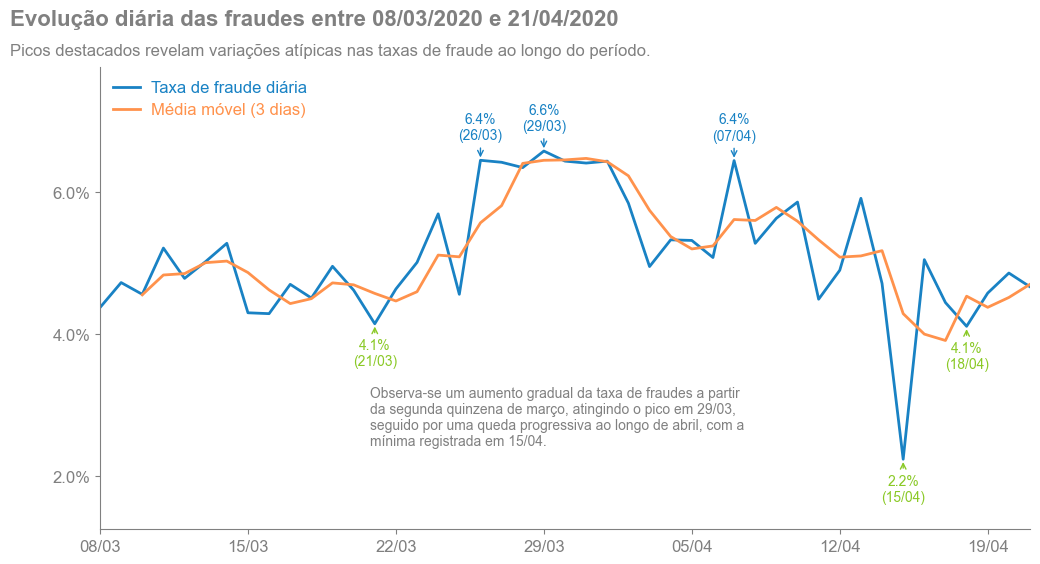

In [73]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Linhas principais - Taxa de fraude e média móvel
cols = ["taxa_fraude", "taxa_fraude_mm3"]
colors = ["#1982c4", "#FF924C"]
labels = ["Taxa de fraude diária", "Média móvel (3 dias)"]

for col, color, label in zip(cols, colors, labels):
    ax.plot(
        fraudes_df["data_compra"],
        fraudes_df[col],
        color=color,
        lw=2,
        label=label,
    )

# Eixo Y formatado em percentual
ax.set_ylim(0.0125, 0.0775)
ax.set_yticks([0.02, 0.04, 0.06])
ax.yaxis.set_major_formatter("{x:,.1%}")

# Eixo X formatado
di = fraudes_df["data_compra"].min()
dfl = fraudes_df["data_compra"].max()
ax.set_xlim(di, dfl)
ax.set_xticks(pd.date_range(di, dfl, freq="7D"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# Ticks
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título e subtítulo
fig.text(
    x=0.05,
    y=0.95,
    s=f"Evolução diária das fraudes entre {di:%d/%m/%Y} e {dfl:%d/%m/%Y}",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

fig.text(
    x=0.05,
    y=0.90,
    s="Picos destacados revelam variações atípicas nas taxas de fraude ao longo do período.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Maiores taxas de fraude
top_picos = fraudes_df.nlargest(3, "taxa_fraude")
for _, row in top_picos.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:.1%}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["taxa_fraude"]),
        xytext=(0, 15),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#1982c4",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#1982c4"),
    )

# Menores taxas de fraude
bottom_picos = fraudes_df.nsmallest(3, "taxa_fraude")
for _, row in bottom_picos.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:.1%}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["taxa_fraude"]),
        xytext=(0, -30),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#8AC926",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#8AC926"),
    )

# Comentários
fig.text(
    x=0.35,
    y=0.25,
    s="Observa-se um aumento gradual da taxa de fraudes a partir \nda segunda quinzena de março, atingindo o pico em 29/03,\nseguido por uma queda progressiva ao longo de abril, com a \nmínima registrada em 15/04.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)

# Spines
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Show
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/1-taxa_fraude_diaria.png",
    dpi="figure",
)

<a id="423"></a>
#### 4.2.3. Lucros das transações diárias

Considerando uma margem de 10%, a receita com pedidos legítimos é calculada pela seguinte fórmula:

$$\text{Receita com pedidos legítimos} = 0{,}10 \times \text{Valor dos pedidos legítimos}$$

O lucro corresponde simplesmente à diferença entre a receita e as perdas com fraudes. Assim, o *crescimento dos lucros* dependerá tanto da quantidade quanto do valor dos pedidos — legítimos e fraudulentos. Quanto maior o volume e o valor das fraudes, maiores serão as perdas.

Dessa forma, a taxa de fraudes está diretamente ligada tanto à receita quanto ao lucro. Quando elevada, ela pode impactar significativamente os resultados financeiros, reduzindo as margens de lucro — o que reforça a importância de seu monitoramento constante.

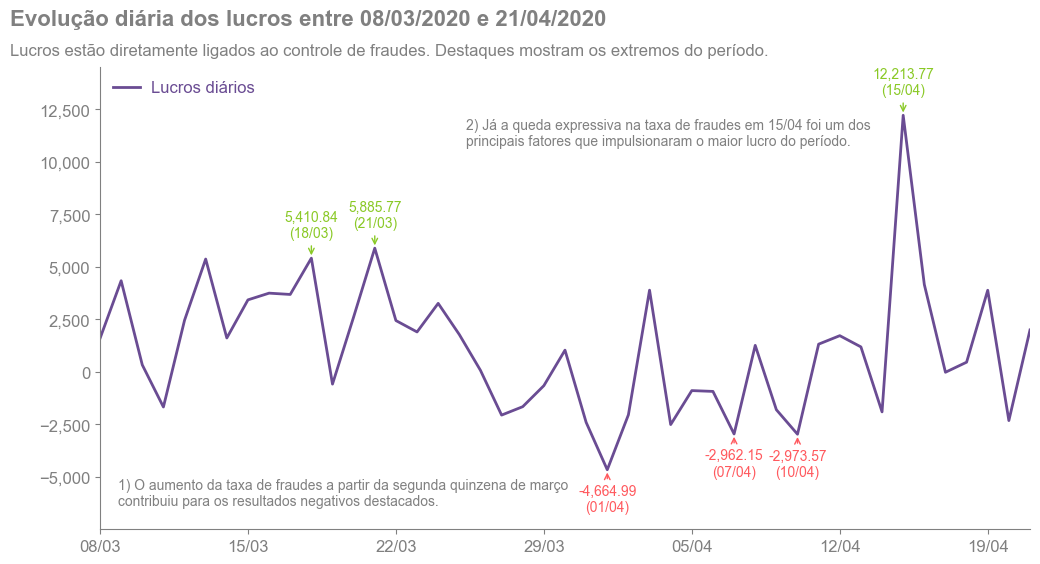

In [74]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Linha - Lucro
ax.plot(
    fraudes_df["data_compra"],
    fraudes_df["lucro"],
    color="#6A4C93",
    lw=2,
    label="Lucros diários",
)


# Eixo Y formatado
ax.set_ylim(-7500, 14500)
ax.set_yticks(np.arange(-5000, 15000, 2500))
ax.yaxis.set_major_formatter("{x:,.0f}")

# Eixo X formatado
di = fraudes_df["data_compra"].min()
dfl = fraudes_df["data_compra"].max()
ax.set_xlim(di, dfl)
ax.set_xticks(pd.date_range(di, dfl, freq="7D"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# Ticks
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título e subtítulo
fig.text(
    x=0.05,
    y=0.95,
    s=f"Evolução diária dos lucros entre {di:%d/%m/%Y} e {dfl:%d/%m/%Y}",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

fig.text(
    x=0.05,
    y=0.90,
    s="Lucros estão diretamente ligados ao controle de fraudes. Destaques mostram os extremos do período.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Maiores lucros
top_picos = fraudes_df.nlargest(3, "lucro")
for _, row in top_picos.iterrows():
    ax.annotate(
        text=f"{row['lucro']:,.2f}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["lucro"]),
        xytext=(0, 15),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#8AC926",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#8AC926"),
    )

# Menores lucros
bottom_picos = fraudes_df.nsmallest(3, "lucro")
for _, row in bottom_picos.iterrows():
    ax.annotate(
        text=f"{row['lucro']:,.2f}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["lucro"]),
        xytext=(0, -30),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#FF595E",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#FF595E"),
    )


# Comentários
fig.text(
    x=0.14,
    y=0.15,
    s="1) O aumento da taxa de fraudes a partir da segunda quinzena de março \ncontribuiu para os resultados negativos destacados.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

fig.text(
    x=0.43,
    y=0.75,
    s="2) Já a queda expressiva na taxa de fraudes em 15/04 foi um dos \nprincipais fatores que impulsionaram o maior lucro do período.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color("#6A4C93")
    text.set_fontsize(12)

# Spines
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Show
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/2-lucros_diarios.png",
    dpi="figure",
)

<a id="424"></a>
#### 4.2.4. Valor médio das transações (fraudulentas e legítimas)

Esses KPIs representam o *valor médio* por transação, calculados pela divisão entre o valor total e a quantidade de pedidos. Funcionam, portanto, como uma espécie de “ticket médio”.

Esses indicadores estão diretamente relacionados às receitas e despesas da empresa. De modo geral, um *valor médio dos pedidos legítimos* mais alto é desejável, já que uma porcentagem desse valor se converte em receita. Por outro lado, um *valor médio das fraudes* elevado é prejudicial, pois representa perdas financeiras em cada transação fraudulenta.

As fórmulas utilizadas são:

$$\text{Valor médio das fraudes} = \frac{\text{Valor total das fraudes}}{\text{Quantidade de fraudes}}$$

<br>

$$\text{Valor médio dos pedidos legítimos} = \frac{\text{Valor total dos pedidos legítimos}}{\text{Quantidade de pedidos legítimos}}$$

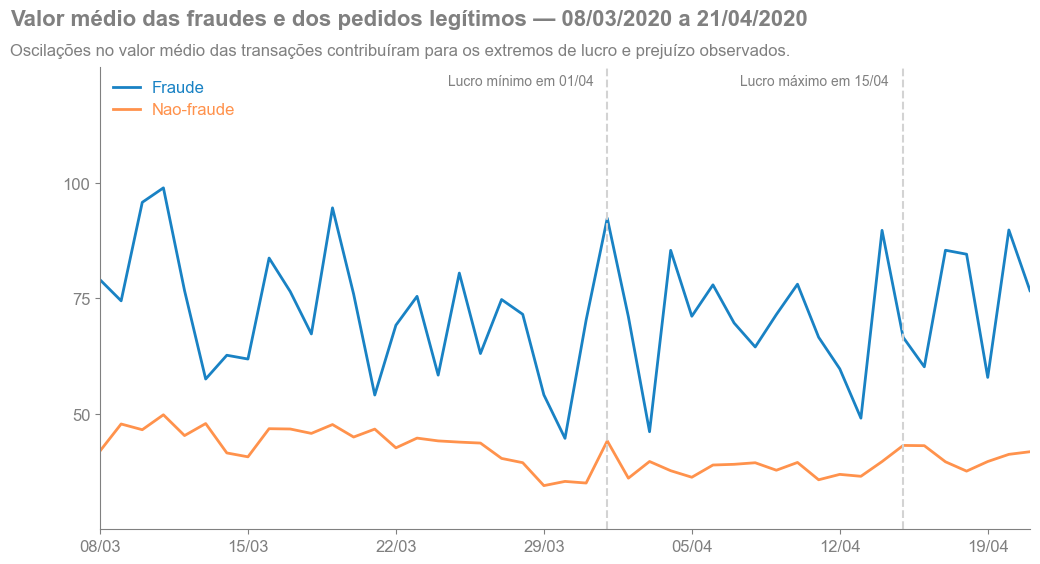

In [75]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Linhas principais - Valor médio
cols = ["valor_medio_fraude", "valor_medio_nao_fraude"]
colors = ["#1982c4", "#FF924C"]
labels = ["Fraude", "Nao-fraude"]

for col, color, label in zip(cols, colors, labels):
    ax.plot(
        fraudes_df["data_compra"],
        fraudes_df[col],
        color=color,
        lw=2,
        label=label,
    )

# Eixo Y formatado
ax.set_ylim(25, 125)
ax.set_yticks([50, 75, 100])
ax.yaxis.set_major_formatter("{x:,.0f}")

# Eixo X formatado
di = fraudes_df["data_compra"].min()
dfl = fraudes_df["data_compra"].max()
ax.set_xlim(di, dfl)
ax.set_xticks(pd.date_range(di, dfl, freq="7D"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# Ticks
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título e subtítulo
fig.text(
    x=0.05,
    y=0.95,
    s=f"Valor médio das fraudes e dos pedidos legítimos — 08/03/2020 a 21/04/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

fig.text(
    x=0.05,
    y=0.90,
    s="Oscilações no valor médio das transações contribuíram para os extremos de lucro e prejuízo observados.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Linha vertical no dia com maior lucro
maior_lucro = fraudes_df.nlargest(1, "lucro")
ax.axvline(
    x=maior_lucro["data_compra"].iloc[0],
    ymin=0,
    ymax=1,
    linestyle="--",
    color="lightgrey",
)

# Linha vertical no dia com menor lucro
menor_lucro = fraudes_df.nsmallest(1, "lucro")
ax.axvline(
    x=menor_lucro["data_compra"].iloc[0],
    ymin=0,
    ymax=1,
    linestyle="--",
    color="lightgrey",
)

# Comentários
fig.text(
    x=0.415,
    y=0.85,
    s=f"Lucro mínimo em {menor_lucro['data_compra'].iloc[0]:%d/%m}",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

fig.text(
    x=0.658,
    y=0.85,
    s=f"Lucro máximo em {maior_lucro['data_compra'].iloc[0]:%d/%m}",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)

# Spines
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/3-valor_medio_diario.png",
    dpi="figure",
)

<a id="43"></a>
### 4.3. Tendências mensais e lucros

Aqui, investigou-se qual foi desempenho mensal, com os indicadores sendo calculados para os meses de março e abril. 

<a id="431"></a>
#### 4.3.1. Obtenção dos dados mensais

Novamente, os dados foram agrupados com por meio da função `pivot_table` do `pandas`. Foram calculados volume, valor, valor médio, taxa de fraude e lucro, por mês e por tipo de transação (fraude ou não-fraude).

In [76]:
# Criar coluna com mês (formato AAAA-MM) para agrupamento
df["mes"] = df["data_compra"].apply(lambda x: x.strftime("%b"))

# Agrupar por mês e fraude e calcular volume, valor total e valor médio
fraudes_mth = pd.pivot_table(
    df,
    index="mes",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
    sort=False,
)

# Limpar nomes das colunas
fraudes_mth.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_mth.columns.values
]
fraudes_mth.reset_index(inplace=True)

# Renomear colunas
fraudes_mth.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular volume total, taxa de fraude, receitas e lucro
fraudes_mth["volume_total"] = (
    fraudes_mth["volume_nao_fraude"] + fraudes_mth["volume_fraude"]
)
fraudes_mth["taxa_fraude"] = fraudes_mth["volume_fraude"] / fraudes_mth["volume_total"]
fraudes_mth["receitas"] = 0.10 * fraudes_mth["valor_nao_fraude"]
fraudes_mth["lucro"] = fraudes_mth["receitas"] - fraudes_mth["valor_fraude"]

# Visualizar o DataFrame
fraudes_mth.head()

,mes,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,taxa_fraude,receitas,lucro
0,Mar,73084,3877,3240261.90,282179.80,44.34,72.78,76961,0.05,324026.19,41846.39
1,Apr,69416,3623,2740937.10,265091.32,39.49,73.17,73039,0.05,274093.71,9002.39


<a id="432"></a>
#### 4.3.2. Receitas e perdas mensais

O desempenho de abril foi significativamente inferior ao de março. Essa queda pode ser atribuída a três fatores principais: (1) redução no volume de pedidos, (2) aumento no valor médio das fraudes e (3) diminuição no valor médio dos pedidos legítimos. Esses elementos, em conjunto, resultaram em uma queda mais acentuada das receitas do que das despesas, comprimindo as margens de lucro.

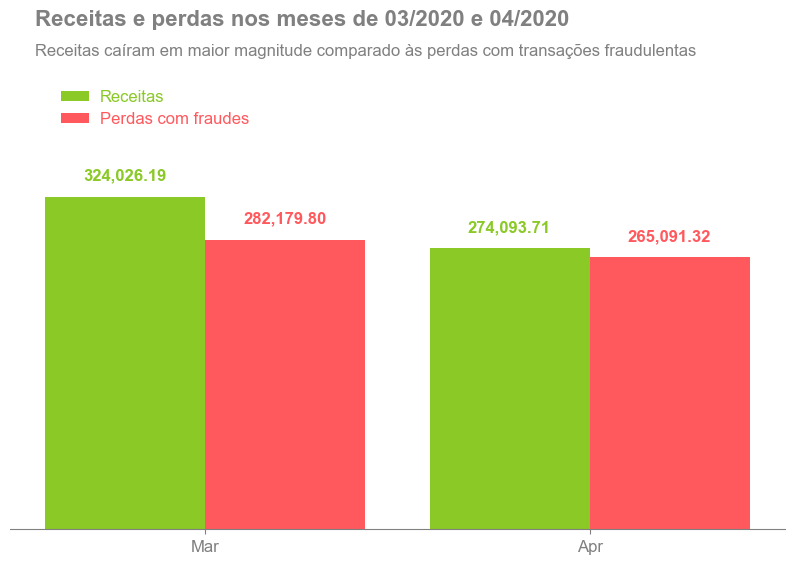

In [77]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

# Colunas e propriedades
cols = ["receitas", "valor_fraude"]
colors = ["#8AC926", "#FF595E"]
labels = ["Receitas", "Perdas com fraudes"]
width = 0.25

# Eixo x automático com base no número de meses
x = np.linspace(0, 0.6, len(fraudes_mth))

# Gráfico de barras agrupadas
for i, (col, label, color) in enumerate(zip(cols, labels, colors)):
    offset = width * i
    bars = ax.bar(x + offset, fraudes_mth[col], width=width, label=label, color=color)

    ax.bar_label(
        bars,
        padding=10,
        fmt="{:,.2f}",
        fontname="Arial",
        fontsize=12,
        color=color,
        weight="bold",
    )

# Ticks no eixo x com nomes dos meses
ax.set_xticks(x + width / 2)
ax.set_xticklabels(fraudes_mth["mes"], fontname="Arial", fontsize=12, color="grey")
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Ocultar eixo y
ax.yaxis.set_visible(False)

# Limite superior para o y
ax.set_ylim(0, 450000)

# Título
fig.text(
    x=0.15,
    y=0.95,
    s="Receitas e perdas nos meses de 03/2020 e 04/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.15,
    y=0.90,
    s="Receitas caíram em maior magnitude comparado às perdas com transações fraudulentas",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Spines
ax.spines[["top", "right", "left"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Legenda
legend = ax.legend(loc="upper left", bbox_to_anchor=(0.05, 0.98))
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)
legend.legendPatch.set_linewidth(0)

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/4-receitas_perdas_mensal.png",
    dpi="figure",
)

<a id="433"></a>
#### 4.3.3. Lucros acumulados por mês

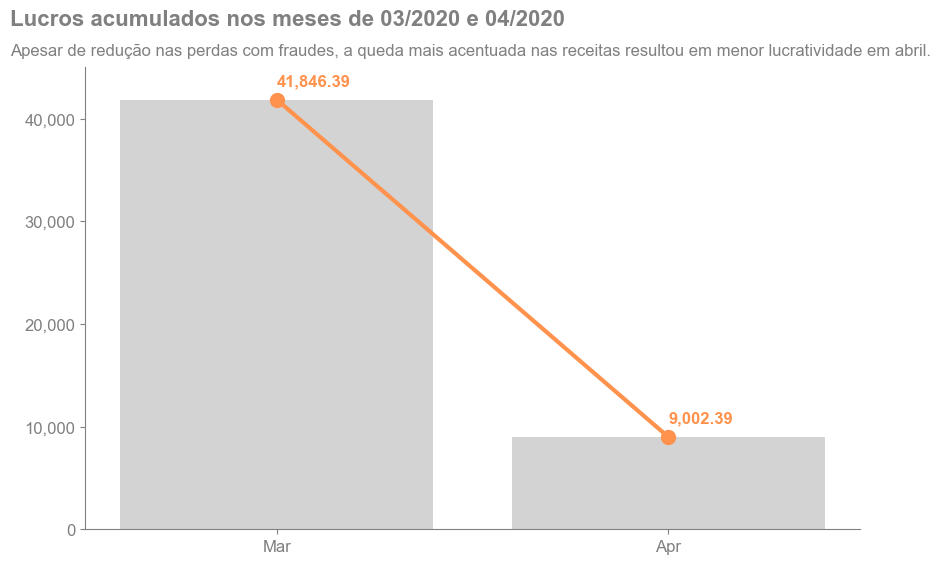

In [78]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

# Vertical bar chart
bar = ax.bar(x="mes", height="lucro", data=fraudes_mth, color="lightgrey")

ax.plot(
    fraudes_mth["mes"],
    fraudes_mth["lucro"],
    color="#FF924C",
    marker="o",
    markersize=10,
    lw=3,
)

xs = fraudes_mth["mes"]
ys = fraudes_mth["lucro"]
for x, y in zip(xs, ys):

    label = "{:,.2f}".format(y)

    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="left",
        fontfamily="Arial",
        fontsize=12,
        weight="bold",
        color="#FF924C",
    )

# Formatar eixos
ax.set_ylim(0, 45000)
ax.yaxis.set_major_formatter("{x:,.0f}")
ax.set_yticks([0, 10000, 20000, 30000, 40000])
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Lucros acumulados nos meses de 03/2020 e 04/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Apesar de redução nas perdas com fraudes, a queda mais acentuada nas receitas resultou em menor lucratividade em abril.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/5-lucros_acumulados_mensal.png",
    dpi="figure",
)

<a id="44"></a>
### 4.4. Desempenho regional: vendas, lucros e riscos

Aqui, buscou-se identificar quais as regiões que mais contribuem para os resultados do negócio e qual a situação dos indicadores de fraude nessas regiões. 

<a id="441"></a>
#### 4.4.1. Obtenção dos dados por região

As regiões com maior volume de pedidos são o Brasil (BR) e a Argentina (AR), que juntas respondem por mais de 95% do total. Por isso, a análise foi concentrada nas 5 regiões com maior volume de pedidos, que representam praticamente 100% das transações.

In [79]:
# Agrupar por país e fraude
fraudes_regiao_df = pd.pivot_table(
    df,
    index="pais",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
    observed=False,
    dropna=False,
)

# Limpar nomes das colunas
fraudes_regiao_df.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_regiao_df.columns.values
]

# Renomear colunas
fraudes_regiao_df.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular total de pedidos por país
fraudes_regiao_df["volume_total"] = (
    fraudes_regiao_df["volume_nao_fraude"] + fraudes_regiao_df["volume_fraude"]
)

# Ordenar do maior para o menor volume
fraudes_regiao_df.sort_values(by="volume_total", ascending=False, inplace=True)

# Calcular percentual acumulado de pedidos
fraudes_regiao_df["volume_acumulado_pct"] = (
    fraudes_regiao_df["volume_total"].cumsum() / fraudes_regiao_df["volume_total"].sum()
)

# Calcular taxa de fraude por país
fraudes_regiao_df["taxa_fraude"] = (
    fraudes_regiao_df["volume_fraude"] / fraudes_regiao_df["volume_total"]
)

# Calcular receitas e lucros (margem de 10%)
fraudes_regiao_df["receitas"] = 0.10 * fraudes_regiao_df["valor_nao_fraude"]
fraudes_regiao_df["lucros"] = (
    fraudes_regiao_df["receitas"] - fraudes_regiao_df["valor_fraude"]
)

# Resetar índice
fraudes_regiao_df.reset_index(inplace=True)

# Visualizar os DataFrame
fraudes_regiao_df.head()

,pais,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,volume_acumulado_pct,taxa_fraude,receitas,lucros
0,BR,105466,6162,3788177.63,424820.81,35.92,68.94,111628,0.74,0.06,378817.76,-46003.05
1,AR,30785,1179,1881617.66,110264.58,61.12,93.52,31964,0.96,0.04,188161.77,77897.19
2,UY,2938,29,164297.35,1364.72,55.92,47.06,2967,0.98,0.01,16429.74,15065.02
3,US,2203,70,108544.79,6775.67,49.27,96.80,2273,0.99,0.03,10854.48,4078.81
4,SE,343,15,7641.64,377.96,22.28,25.20,358,0.99,0.04,764.16,386.20


<a id="442"></a>
#### 4.4.2. Lucros acumulados por regiao

O Brasil é o principal mercado, concentrando cerca de 74% dos pedidos — mais de três vezes o volume da Argentina, segunda colocada. Apesar disso, foi a região com o maior prejuízo acumulado. Esse resultado se deve, principalmente, a (1) uma alta taxa de fraudes e (2) um valor médio das fraudes significativamente superior ao dos pedidos legítimos.

Observação: no eixo horizontal, os países foram ordenados por volume total de pedidos; o mesmo vale para próximos gráficos.

In [80]:
# Adionar coluna com cores - para auxliar construção do gráfico
fraudes_regiao_df["color"] = np.where(
    fraudes_regiao_df["lucros"] > 0, "#8AC926", "#FF595E"
)

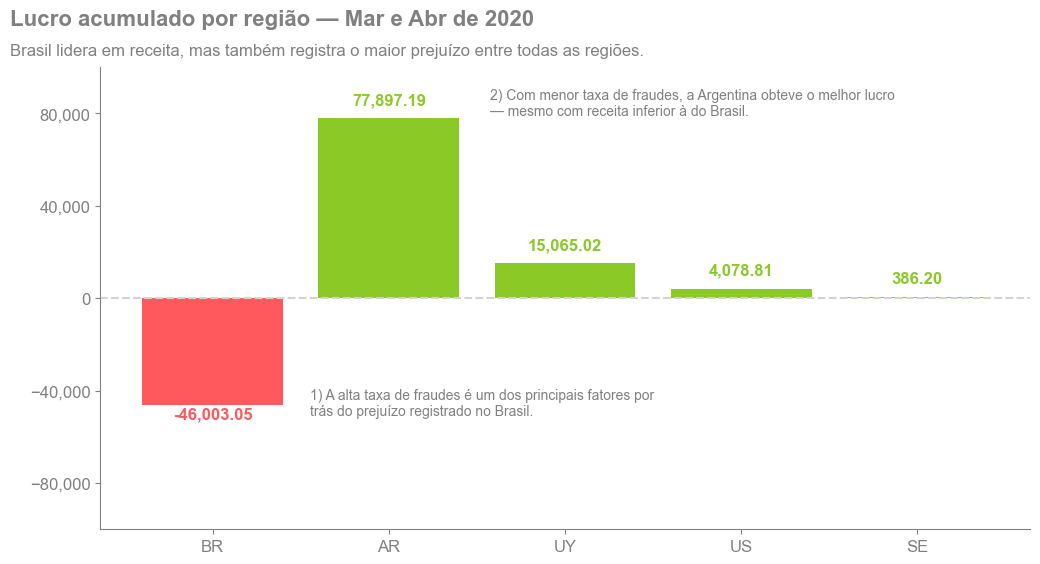

In [81]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Selecionar top 5 países por volume total de pedidos
top_five = fraudes_regiao_df.nlargest(5, "volume_total")

# Gráfico de barras verticais com coloração condicional
bars = ax.bar(x="pais", height="lucros", data=top_five, color=top_five["color"])

# Rótulo das barras (lucro ou prejuízo)
for _, row in top_five.iterrows():
    offset = 10 if row["lucros"] > 0 else -10
    ax.annotate(
        text=f"{row['lucros']:,.2f}",
        xy=(row["pais"], row["lucros"]),
        xytext=(0, offset),
        textcoords="offset points",
        ha="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Formatar eixos
ax.set_ylim(-100000, 100000)
ax.yaxis.set_major_formatter("{x:,.0f}")
ax.set_yticks([-80000, -40000, 0, 40000, 80000])
ax.tick_params(colors="grey", labelsize=12)

# Adicionar linha horizontal - zero
ax.axhline(0, 0, 1, linestyle="--", color="lightgrey")

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Lucro acumulado por região — Mar e Abr de 2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Brasil lidera em receita, mas também registra o maior prejuízo entre todas as regiões.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Comentários
fig.text(
    x=0.30,
    y=0.30,
    s="1) A alta taxa de fraudes é um dos principais fatores por\ntrás do prejuízo registrado no Brasil.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

fig.text(
    x=0.45,
    y=0.80,
    s="2) Com menor taxa de fraudes, a Argentina obteve o melhor lucro\n— mesmo com receita inferior à do Brasil.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/6-lucros_regiao.png",
    dpi="figure",
)

<a id="443"></a>
#### 4.4.3. Taxa de fraudes por região

Abaixo, fica claro que taxa de fraude do Brasil, em vermelho, é a maior entre as 5 analisadas. O Uruguai (UY), cujo volume de pedidos é signifcativamente menor que o do Brasil, tem a menor taxa de fraudes e o segundo maior lucro.

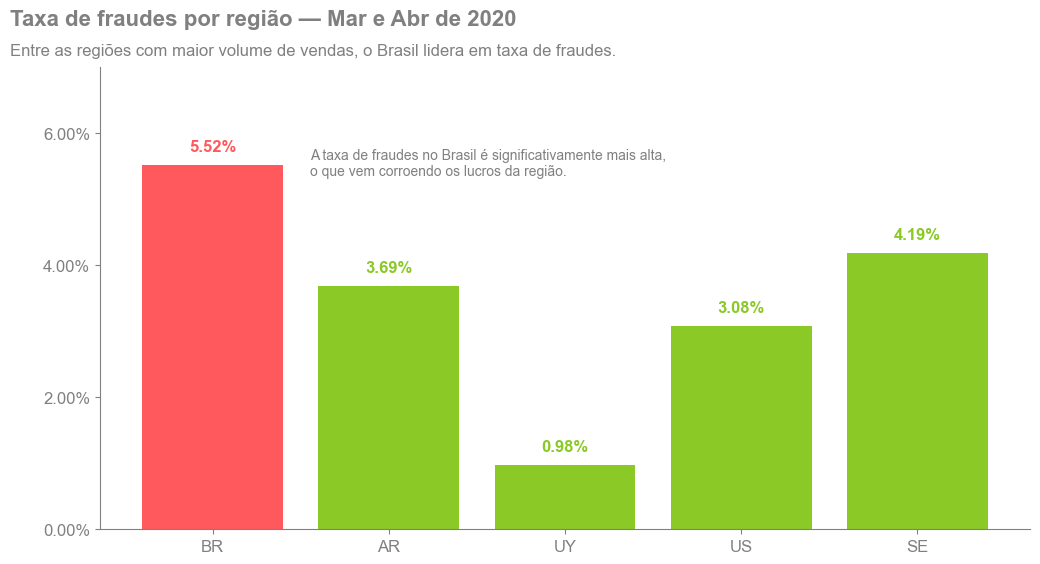

In [82]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Selecionar top 5 países por volume total de pedidos
top_five = fraudes_regiao_df.nlargest(5, "volume_total")

# Gráfico de barras verticais com coloração condicional
bars = ax.bar(x="pais", height="taxa_fraude", data=top_five, color=top_five["color"])

# Rótulo das barras (lucro ou prejuízo)
for _, row in top_five.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:,.2%}",
        xy=(row["pais"], row["taxa_fraude"]),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Formatar eixos
ax.set_ylim(0, 0.07)
ax.yaxis.set_major_formatter("{x:,.2%}")
ax.set_yticks([0, 0.02, 0.04, 0.06])
ax.tick_params(colors="grey", labelsize=12)

# Adicionar linha horizontal - zero
# ax.axhline(0, 0, 1, linestyle='--', color='lightgrey')

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Taxa de fraudes por região — Mar e Abr de 2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Entre as regiões com maior volume de vendas, o Brasil lidera em taxa de fraudes.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Comentário
fig.text(
    x=0.30,
    y=0.70,
    s="A taxa de fraudes no Brasil é significativamente mais alta,\no que vem corroendo os lucros da região.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/7-taxa_fraude_regiao.png",
    dpi="figure",
)

<a id="444"></a>
#### 4.4.4. Valor médio das transações por região

Como discutido anteriormente, o valor médio das fraudes impacta diretamente os resultados financeiros. No entanto, mesmo com valores médios elevados, é possível obter lucro — como demonstram os casos da Argentina (AR) e dos Estados Unidos (US), que apresentaram resultados positivos apesar de altos valores médios de fraude.

O Brasil teve o 3º maior valor médio de fraudes entre as 5 regiões analisadas, mas apenas o 4º maior valor médio de pedidos legítimos. Isso reforça que tanto o valor médio das fraudes quanto o baixo valor médio das transações legítimas contribuíram para o resultado negativo da região no período.

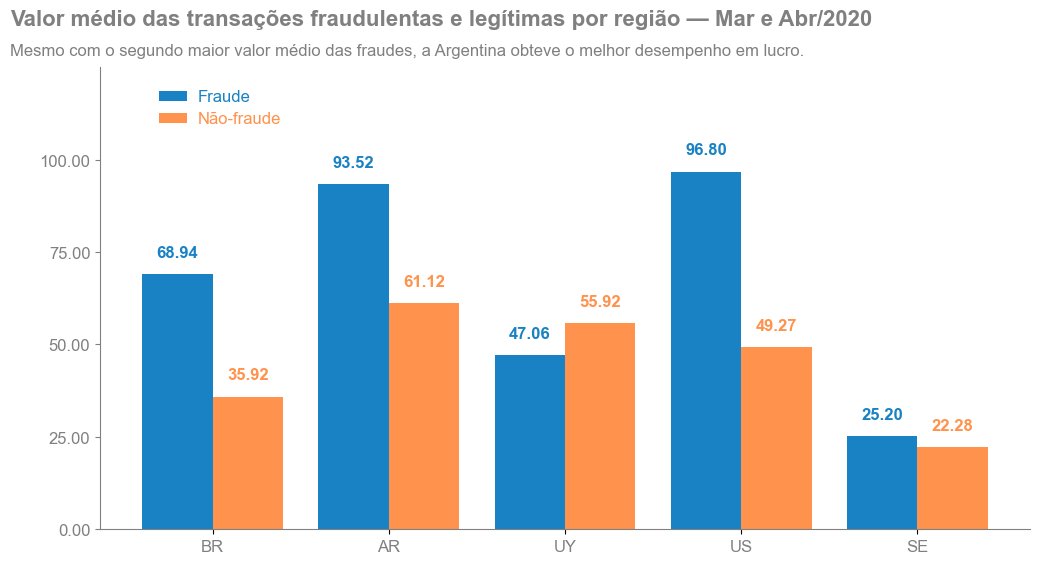

In [83]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Colunas e propriedades
cols = ["valor_medio_fraude", "valor_medio_nao_fraude"]
colors = ["#1982C4", "#FF924C"]
labels = ["Fraude", "Não-fraude"]
width = 0.25

# Eixo x automático com base no número de meses
x = np.linspace(0, 2.5, len(top_five))

# Gráfico de barras agrupadas
for i, (col, label, color) in enumerate(zip(cols, labels, colors)):
    offset = width * i
    bars = ax.bar(x + offset, top_five[col], width=width, label=label, color=color)

    ax.bar_label(
        bars,
        padding=10,
        fmt="{:,.2f}",
        fontname="Arial",
        fontsize=12,
        color=color,
        weight="bold",
    )

# Ticks no eixo x com nomes dos meses
ax.set_xticks(x + width / 2)
ax.set_xticklabels(top_five["pais"], fontname="Arial", fontsize=12, color="grey")

# Configurar ticks no eixo y e formatar
ax.set_ylim(0, 125)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter("{x:,.2f}")
ax.tick_params(axis="y", colors="grey", labelsize=12, labelcolor="grey")

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Valor médio das transações fraudulentas e legítimas por região — Mar e Abr/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Mesmo com o segundo maior valor médio das fraudes, a Argentina obteve o melhor desempenho em lucro.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", bbox_to_anchor=(0.05, 0.98))
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)
legend.legendPatch.set_linewidth(0)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/8-valor_medio_regiao.png",
    dpi="figure",
)

<a id="45"></a>
### 4.5. Desempenho por categoria de produto

O conjunto de dados contém um total de 8.324 categorias de produto. Para simplificar a análise, optou-se por focar nas 5 categorias com maior lucro e nas 5 com maior prejuízo, totalizando 10 categorias. A partir delas, foram analisados os principais indicadores para entender os fatores que influenciaram seus resultados.

In [84]:
# Total de categorias de produto únicas
df["categoria_produto"].cat.categories.size

8324

<a id="451"></a>
#### 4.5.1. Obtenção dos dados

In [85]:
# Agrupar por país e fraude
fraudes_categoria_df = pd.pivot_table(
    df,
    index="categoria_produto",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
    observed=False,
    dropna=False,
    fill_value=0,
)

# Limpar nomes das colunas
fraudes_categoria_df.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_categoria_df.columns.values
]

# Renomear colunas
fraudes_categoria_df.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular total de pedidos por país
fraudes_categoria_df["volume_total"] = (
    fraudes_categoria_df["volume_nao_fraude"] + fraudes_categoria_df["volume_fraude"]
)

# Ordenar do maior para o menor volume
fraudes_categoria_df.sort_values(by="volume_total", ascending=False, inplace=True)

# Calcular percentual acumulado de pedidos
fraudes_categoria_df["volume_acumulado_pct"] = (
    fraudes_categoria_df["volume_total"].cumsum()
    / fraudes_categoria_df["volume_total"].sum()
)

# Calcular taxa de fraude por país
fraudes_categoria_df["taxa_fraude"] = (
    fraudes_categoria_df["volume_fraude"] / fraudes_categoria_df["volume_total"]
)

# Calcular receitas e lucros (margem de 10%)
fraudes_categoria_df["receitas"] = 0.10 * fraudes_categoria_df["valor_nao_fraude"]
fraudes_categoria_df["lucros"] = (
    fraudes_categoria_df["receitas"] - fraudes_categoria_df["valor_fraude"]
)

# Resetar índice
fraudes_categoria_df.reset_index(inplace=True)

# Visualizar os DataFrame - Top 10 categorias em volume total de pedidos
fraudes_categoria_df.head(10)

,categoria_produto,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,volume_acumulado_pct,taxa_fraude,receitas,lucros
0,cat_43b9c10,1951,380,474357.62,115155.71,243.14,303.04,2331,0.02,0.16,47435.76,-67719.95
1,cat_d69bed9,1745,54,46678.94,1658.84,26.75,30.72,1799,0.03,0.03,4667.89,3009.05
2,cat_604df77,1713,71,47161.12,3241.65,27.53,45.66,1784,0.04,0.04,4716.11,1474.46
3,cat_6c4cfdc,1375,74,19530.57,1425.72,14.20,19.27,1449,0.05,0.05,1953.06,527.34
4,cat_4249bd8,1093,98,31343.47,3432.19,28.68,35.02,1191,0.06,0.08,3134.35,-297.84
5,cat_3203c7c,1074,19,17186.03,401.05,16.00,21.11,1093,0.06,0.02,1718.60,1317.55
6,cat_be0af8e,988,52,25347.02,1643.26,25.65,31.60,1040,0.07,0.05,2534.70,891.44
7,cat_0820fab,890,48,8151.09,419.51,9.16,8.74,938,0.08,0.05,815.11,395.60
8,cat_8ef7164,828,81,14849.12,1050.45,17.93,12.97,909,0.08,0.09,1484.91,434.46
9,cat_d5975ae,818,60,9520.15,1383.15,11.64,23.05,878,0.09,0.07,952.01,-431.14


In [86]:
# Top 5 categorias com maior receita
fraudes_categoria_df.nlargest(5, "receitas")[
    ["categoria_produto", "receitas", "lucros"]
]

,categoria_produto,receitas,lucros
0,cat_43b9c10,47435.76,-67719.95
46,cat_e5ca240,15735.76,-20715.73
50,cat_23212a0,8510.09,-16356.50
45,cat_a4921b8,5029.41,2725.11
2,cat_604df77,4716.11,1474.46


<a id="452"></a>
#### 4.5.2. Produtos com maior lucro e maior prejuízo

Abaixo, as categorias foram plotadas em ordem decrescente, dos maiores lucros (em verde) aos maiores prejuízos (em vermelho).

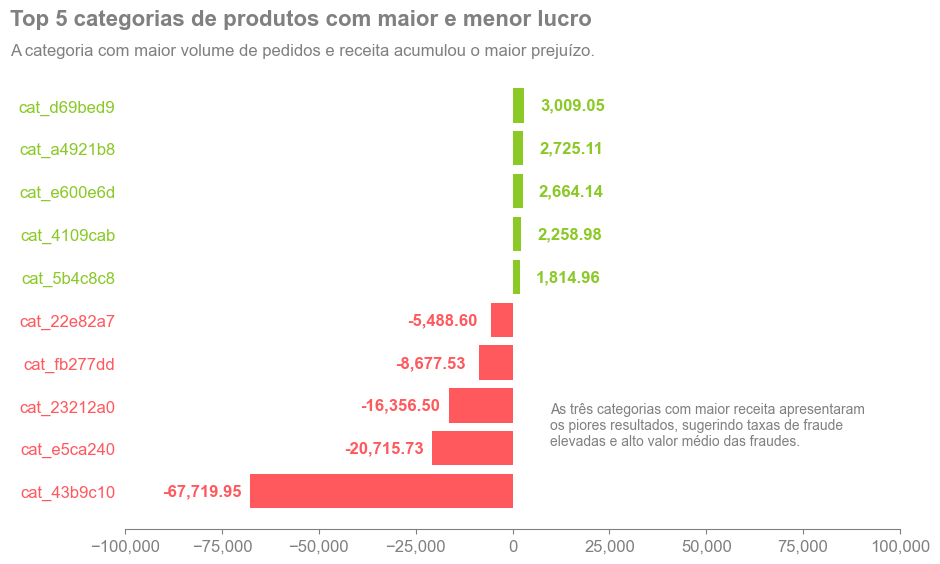

In [87]:
# Figura e eixos
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor="white")

# Gráfico de barras horizontais
bar_data = pd.concat(
    [
        fraudes_categoria_df.nlargest(5, "lucros"),
        fraudes_categoria_df.nsmallest(5, "lucros"),
    ]
).sort_values("lucros", ascending=True)

bar_data["color"] = np.where(bar_data["lucros"] > 0, "#8AC926", "#FF595E")
bar = ax.barh(
    y=bar_data["categoria_produto"],
    width=bar_data["lucros"],
    color=bar_data["color"],
)

# Rótulo das barras (lucro ou prejuízo)
for _, row in bar_data.iterrows():
    offset = 35 if row["lucros"] > 0 else -35
    ax.annotate(
        text=f"{row['lucros']:,.2f}",
        xy=(row["lucros"], row["categoria_produto"]),
        xytext=(offset, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Limites do eixo x
ax.set_xlim(-100000, 100000)

# Estilo dos rótulos de eixo, coloridos conforme lucro/prejuízo
for ytick_label, lucro in zip(ax.get_yticklabels(), bar_data["lucros"]):
    ytick_label.set_fontname("Arial")
    ytick_label.set_fontsize(12)
    color = (
        "#8AC926" if lucro > 0 else "#FF595E"
    )  # Cor: verde para lucro, vermelho para prejuízo
    ytick_label.set_color(color)

# Ticks
ax.tick_params(axis="x", color="grey", labelsize=12, labelcolor="grey", left=False)
ax.tick_params(axis="y", left=False)

# Formatar eixo x
ax.xaxis.set_major_formatter("{x:,.0f}")

# Título
fig.text(
    x=0.01,
    y=0.95,
    s="Top 5 categorias de produtos com maior e menor lucro",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.01,
    y=0.90,
    s="A categoria com maior volume de pedidos e receita acumulou o maior prejuízo.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Comentários
fig.text(
    x=0.55,
    y=0.25,
    s="As três categorias com maior receita apresentaram\nos piores resultados, sugerindo taxas de fraude\nelevadas e alto valor médio das fraudes.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Limpar bordas
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/9-categorias_resultados.png",
    dpi="figure",
)

<a id="453"></a>
#### 4.5.3. Taxa de fraude nas categorias com maior lucro e maior prejuízo

A figura abaixo mostra que as categorias com maior prejuízo apresentam taxas de fraude significativamente mais altas. Isso ajuda a explicar seus resultados negativos e sugere que essas categorias podem estar desproporcionalmente associadas a transações fraudulentas.

Observação: a ordem das categorias no eixo y foi mantida neste e no próximo gráfico, para manter a consistência visual.

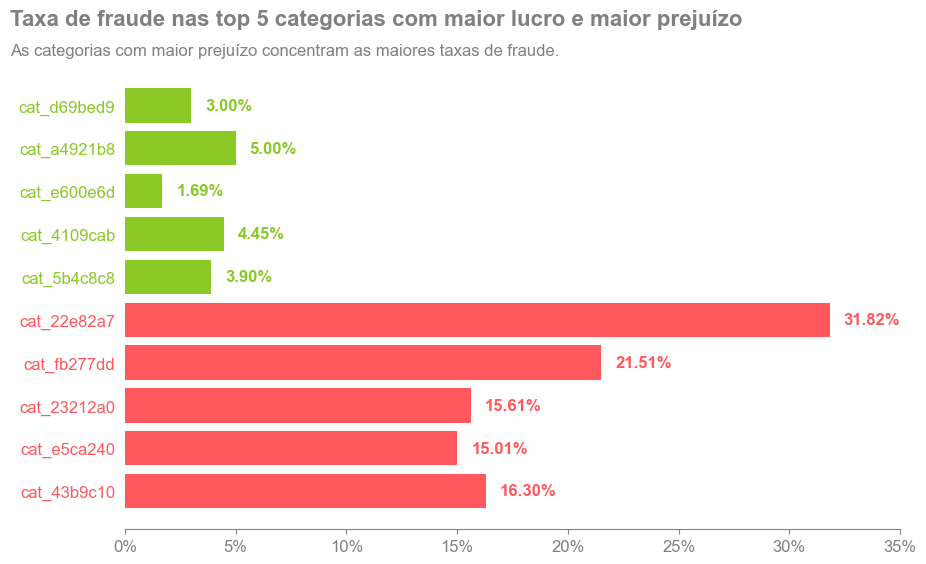

In [88]:
# Figura e eixos
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor="white")

# Gráfico de barras horizontais
bar_data = pd.concat(
    [
        fraudes_categoria_df.nlargest(5, "lucros"),
        fraudes_categoria_df.nsmallest(5, "lucros"),
    ]
).sort_values("lucros", ascending=True)

bar_data["color"] = np.where(bar_data["lucros"] > 0, "#8AC926", "#FF595E")
bar = ax.barh(
    y=bar_data["categoria_produto"],
    width=bar_data["taxa_fraude"],
    color=bar_data["color"],
)

# Rótulo das barras
for _, row in bar_data.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:,.2%}",
        xy=(row["taxa_fraude"], row["categoria_produto"]),
        xytext=(10, 0),
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Limites do eixo x
ax.set_xlim(0, 0.35)

# Estilo dos rótulos de eixo, coloridos conforme lucro/prejuízo
for ytick_label, lucro in zip(ax.get_yticklabels(), bar_data["lucros"]):
    ytick_label.set_fontname("Arial")
    ytick_label.set_fontsize(12)
    color = (
        "#8AC926" if lucro > 0 else "#FF595E"
    )  # Cor: verde para lucro, vermelho para prejuízo
    ytick_label.set_color(color)

# Ticks
ax.set_xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])
ax.tick_params(axis="x", color="grey", labelsize=12, labelcolor="grey", left=False)
ax.tick_params(axis="y", left=False)

# Formatar eixo x
ax.xaxis.set_major_formatter("{x:,.0%}")

# Título
fig.text(
    x=0.01,
    y=0.95,
    s="Taxa de fraude nas top 5 categorias com maior lucro e maior prejuízo",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.01,
    y=0.90,
    s="As categorias com maior prejuízo concentram as maiores taxas de fraude.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Limpar bordas
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/10-categorias_taxa_fraude.png",
    dpi="figure",
)

<a id="454"></a>
#### 4.5.4. Valor médio das fraudes nas categorias com maior lucro e maior prejuízo

Além das altas taxas de fraude, as categorias com prejuízo também apresentam valores médios de fraude significativamente superiores aos das categorias com lucro. Esse fator contribui diretamente para os resultados negativos observados.

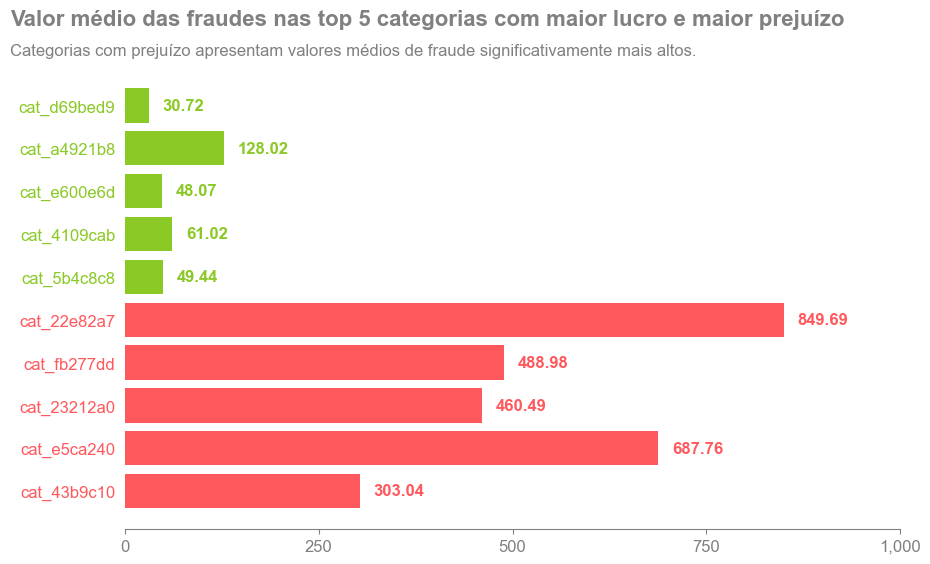

In [89]:
# Figura e eixos
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor="white")

# Gráfico de barras horizontais
bar_data = pd.concat(
    [
        fraudes_categoria_df.nlargest(5, "lucros"),
        fraudes_categoria_df.nsmallest(5, "lucros"),
    ]
).sort_values("lucros", ascending=True)

bar_data["color"] = np.where(bar_data["lucros"] > 0, "#8AC926", "#FF595E")
bar = ax.barh(
    y=bar_data["categoria_produto"],
    width=bar_data["valor_medio_fraude"],
    color=bar_data["color"],
)

# Rótulo das barras
for _, row in bar_data.iterrows():
    ax.annotate(
        text=f"{row['valor_medio_fraude']:,.2f}",
        xy=(row["valor_medio_fraude"], row["categoria_produto"]),
        xytext=(10, 0),
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Estilo dos rótulos de eixo, coloridos conforme lucro/prejuízo
for ytick_label, lucro in zip(ax.get_yticklabels(), bar_data["lucros"]):
    ytick_label.set_fontname("Arial")
    ytick_label.set_fontsize(12)
    color = (
        "#8AC926" if lucro > 0 else "#FF595E"
    )  # Cor: verde para lucro, vermelho para prejuízo
    ytick_label.set_color(color)

# Ticks
ax.set_xticks([0, 250, 500, 750, 1000])
ax.tick_params(axis="x", color="grey", labelsize=12, labelcolor="grey", left=False)
ax.tick_params(axis="y", left=False)

# Formatar eixo x
ax.xaxis.set_major_formatter("{x:,.0f}")

# Título
fig.text(
    x=0.01,
    y=0.95,
    s="Valor médio das fraudes nas top 5 categorias com maior lucro e maior prejuízo",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.01,
    y=0.90,
    s="Categorias com prejuízo apresentam valores médios de fraude significativamente mais altos.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Limpar bordas
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/11-categorias_valor_medio.png",
    dpi="figure",
)

<a id="5"></a>
## 5. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

A Análise Exploratória de Dados — *Exploratory Data Analysis (EDA)*, em inglês — tem como objetivo examinar e caracterizar o conjunto de dados disponível. Essa etapa busca compreender como as variáveis estão distribuídas, como se relacionam entre si, além de identificar anomalias, padrões e avaliar a qualidade geral dos dados.

<a id="51"></a>
### 5.1. Descrição do conjunto de dados

In [90]:
# Mostrar primeiras linhas
df.head(3)

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude,mes
0,4,0.77,94436.24,20.00,0.44,1.00,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,240.00,102.00,1,NaN,N,2020-03-27,5.64,66,0,Mar
1,4,0.76,9258.50,1.00,0.00,33.00,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,4008.00,0.00,1,Y,N,2020-04-15,124.71,72,0,Apr
2,4,0.75,242549.09,3.00,0.00,19.00,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,1779.00,77.00,1,NaN,N,2020-03-25,339.32,95,0,Mar


In [91]:
# Shape - Qtd. de registros vs. Qtd. de colunas
print(df.shape)

(150000, 21)


In [92]:
# Listar todas as colunas
print(df.columns)

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'pais', 'score_7', 'produto', 'categoria_produto', 'score_8', 'score_9',
       'score_10', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3',
       'data_compra', 'valor_compra', 'score_fraude_modelo', 'fraude', 'mes'],
      dtype='object')


Nas colunas referentes à entrega de documentos (`entrega_doc_1`, `entrega_doc_2`, `entrega_doc_3`), os valores nulos foram tratados como "Não". Além disso, para facilitar o cálculo de estatísticas, essas colunas, juntamente com a coluna `fraude`, foram convertidas para o tipo `category` do Pandas.

In [93]:
# Substituindo 'Y' por 'Sim' e 'N' por 'Não' - NaN considerado como 'Não'
for i in [1, 2, 3]:
    df[f"entrega_doc_{i}"] = (
        df[f"entrega_doc_{i}"]
        .fillna("Não")
        .replace([1, "Y", 0, "N"], ["Sim", "Sim", "Não", "Não"])
        .astype("category")
    )

In [94]:
# Substituindo 1 por "Fraude" e 0 por "Não-fraude"
df["fraude"] = pd.Categorical(df["fraude"].map({0: "Não-Fraude", 1: "Fraude"}))

<a id="52"></a>
### 5.2. Análise univariada

Na análise univariada, examina-se individualmente a distribuição de cada variável, por meio do cálculo de estatísticas descritivas e da utilização de métodos visuais.

In [95]:
# Estattísticas calculadas
stats = (
    "nobs",
    "missing",
    "mean",
    "std_err",
    "std",
    "coef_var",
    "range",
    "max",
    "min",
    "skew",
    "mode",
    "freq",
    "median",
    "percentiles",
    "distinct",
    "top",
    "freq",
)

Para o cálculo das estatísticas descritivas, foi criado um objeto da classe `Description`, disponível no módulo `statsmodels.stats.descriptivestats`.

In [96]:
# Calcular estatísticas descritivas
profile = Description(data=df, stats=stats, percentiles=[5, 25, 50, 75, 95])

<a id="521"></a>
#### 5.2.1. Variáveis numéricas

Em síntese, as variáveis numéricas concentram informações relacionadas aos scores de crédito, ao valor de compra e ao score de fraude (modelo atual). Além das estatísticas descritivas selecionadas, foram calculadas as proporções de valores faltantes e de zeros, a fim de complementar a análise da qualidade dos dados. 

Por fim, para facilitar a identificação de estatísticas comparativamente altas ou baixas, o DataFrame foi formatado com a classe `Styler`, do Pandas. Um mapa de cores sequencial foi aplicado **linha a linha (por estatística)**, destacando visualmente os valores em cada coluna.

In [97]:
# Obter o DataFrame com as estatísticas numéricas
profile_numeric = profile.numeric.copy()

# Proporção de valores ausentes
profile_numeric.loc["missing%"] = (
    profile_numeric.loc["missing"] / profile.numeric.loc["nobs"]
)

# Proporção de zeros
profile_numeric.loc["zeros%"] = (
    df.select_dtypes("number").eq(0).sum() / profile_numeric.loc["nobs"]
)

# Gradient de fundo e formatação
s = (
    profile_numeric.style.background_gradient(cmap="binary", axis=1)
    .format("{:,.2f}")
    .set_caption("Estatísticas descritivas - variáveis numéricas")
)

# Exibir o DataFrame formatado
s

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,valor_compra,score_fraude_modelo
nobs,"150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00"
missing,0.00,"12,984.00","12,984.00",365.00,0.00,11.00,0.00,0.00,11.00,365.00,0.00,0.00
mean,3.71,0.73,"260,445.11",21.68,0.22,51.17,14.19,0.50,"2,305.41",299.97,43.52,48.07
std_err,0.00,0.00,"2,286.70",0.05,0.01,1.83,0.04,0.00,4.42,0.83,0.24,0.07
std,0.75,0.13,"846,436.14",20.06,2.43,709.47,14.16,0.29,"1,712.38",321.08,91.56,29.00
coef_var,0.20,0.18,3.25,0.93,11.04,13.87,1.00,0.58,0.74,1.07,2.10,0.60
range,3.00,1.00,"13,878,743.55",50.00,833.33,"145,279.00",58.00,1.00,"7,544.00","2,225.00","3,696.33",100.00
max,4.00,1.00,"13,878,743.71",50.00,833.33,"145,274.00",58.00,1.00,"7,544.00","2,225.00","3,696.35",100.00
min,1.00,0.00,0.16,0.00,0.00,-5.00,0.00,0.00,0.00,0.00,0.02,0.00
skew,-2.37,-1.63,6.72,0.42,281.22,126.18,1.20,0.01,0.68,1.38,9.73,0.02


Analisando a tabela estatística linha a linha, é possível observar:

* `score_3` apresenta valores em uma escala significativamente mais alta que as demais variáveis;
* `score_2` e `score_3` possuem aproximadamente *9% de valores nulos*;
* Os pares (`score_2`, `score_3`), (`score_4`, `score_10`) e (`score_6`, `score_9`) compartilham exatamente a mesma quantidade de valores ausentes, o que pode indicar redundância ou que essas variáveis foram derivadas de uma mesma origem (ver [seção 5.4.](#54));
* `score_5` e `score_6` apresentam *alto coeficiente de variação*, indicando grande dispersão relativa;
* Essas mesmas variáveis (`score_5` e `score_6`) também apresentam *alta assimetria (skewness)*, o que pode sugerir a presença de outliers ou erros de preenchimento;
* Outras colunas com *alta assimetria* incluem: `score_1` (-2.37), `score_3` (6.72) e `valor_compra` (9.73), o que pode indicar distribuições fortemente deslocadas ou presença de valores extremos;
* A variável `score_6` é a única que possui valores negativos — com mínimo de -5.00 — o que pode indicar erro, caso se assuma que scores devem ser sempre não negativos (como é comum);
* Cerca de *86%* dos valores de `score_1` são iguais a 4, caracterizando uma variável altamente *desbalanceada*;
* Aproximadamente *43%* dos valores de `score_5` são iguais a zero, o que pode impactar análises posteriores, dependendo da interpretação do zero nesse contexto;
* Colunas com *alta proporção de zeros* (acima de 5%) também incluem: `score_6` (17%), `score_7` (9%) e `score_10` (11%), o que pode sugerir concentração de massa em torno do zero ou possíveis codificações específicas que merecem investigação adicional.

Os histogramas abaixo reforçam esses apontamentos. Todas as colunas apresentam distribuições claramente *assimétricas*, com exceção de:
* `score_1`, que é uma *variável discreta* com valores entre 1 e 4, mas altamente concentrada no valor 4, indicando forte desbalanceamento;
* `score_8` e `score_fraude_modelo`, que se aproximam de uma *distribuição uniforme*, com frequências relativamente constantes ao longo dos valores.

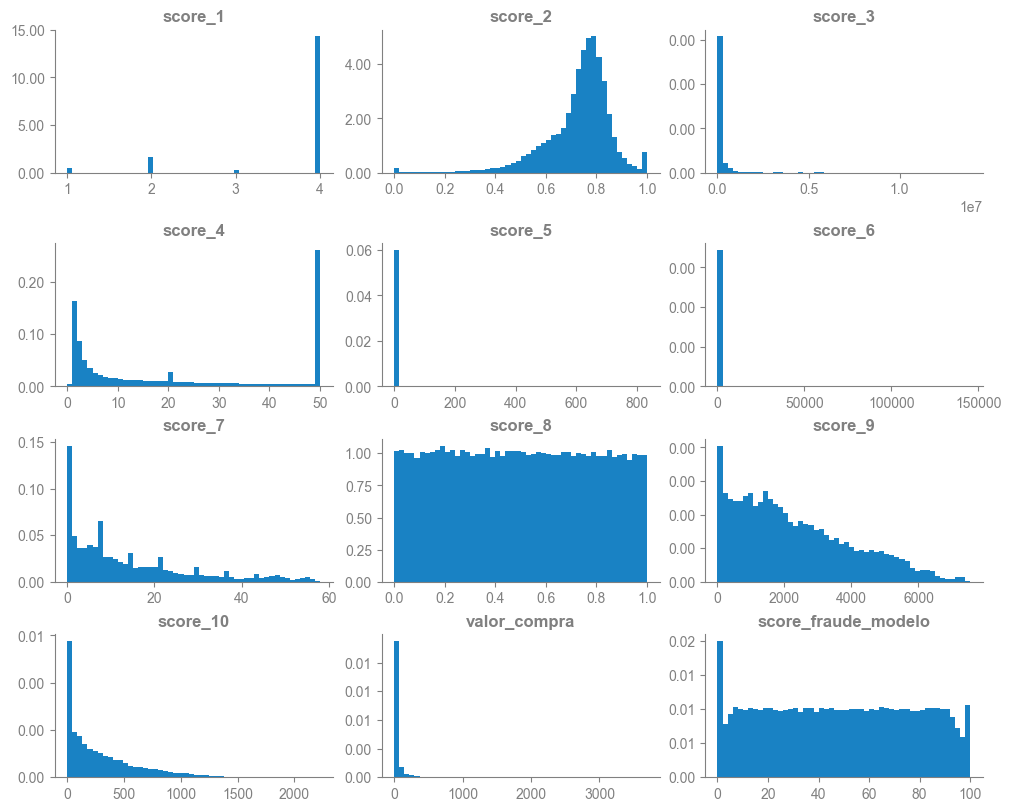

In [98]:
# Figura e eixos
fig, axs = plt.subplots(4, 3, figsize=(10, 8), facecolor="white", layout="constrained")

# Plotar histogramas para cada coluna numérica
numeric_cols = profile_numeric.columns
for ax, col in zip(axs.flatten(), numeric_cols):
    # Histograma
    bar = ax.hist(
        x=df[col],
        bins=50,
        density=True,
        color="#1982C4",
    )

    # Formatar eixos
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    ax.tick_params(colors="grey", labelsize=10, labelfontfamily="Arial")
    ax.yaxis.set_major_formatter("{x:,.2f}")

    # Limpar bordas
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("grey")

    # Título
    ax.set_title(
        col,
        loc="center",
        fontname="Arial",
        fontsize=12,
        color="grey",
        weight="bold",
    )

# Mostrar gráfico
plt.show()


# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/12-histogramas-va-numéricas.png",
    dpi="figure",
)

*Nota: Os scores apresentam assimetria e valores ausentes, mas como não serão utilizados nos testes de hipóteses, nenhuma transformação ou imputação foi realizada nesta etapa.*

<a id="522"></a>
#### 5.2.2. Variáveis categóricas

Para as variáveis categóricas, o foco foi a análise das frequências das classes. Conforme discutido na [seção 4.4.2.](#442), cerca de 74% dos pedidos são oriundos do Brasil (BR) e 21% da Argentina (AR), o que indica uma forte concentração em apenas 2 dos 51 países presentes na coluna `pais`. Já a variável `categoria_produto` apresenta **8.324 categorias distintas**, sem concentração visível em poucos grupos, o que caracteriza **alta cardinalidade**.

Nas colunas referentes à entrega de documentos, a proporção de valores "Sim" foi de, respectivamente, **90%** em `entrega_doc_1`, **16%** em `entrega_doc_2` e **55%** em `entrega_doc_3`. Por fim, a variável `fraude` apresenta proporções de **5% para casos de fraude** e **95% para não fraude**, o que indica um possível **refinamento do conjunto de dados** para fins de análise e modelagem supervisionada.

In [99]:
# Obter o DataFrame com as estatísticas categóricas
profile_categorical = profile.categorical.copy()

# Proporção de valores ausentes
profile_categorical.loc["missing%"] = (
    profile_categorical.loc["missing"] / profile_categorical.loc["nobs"]
)

# Visualizar estatísticas categóricas
profile_categorical

,pais,categoria_produto,entrega_doc_1,entrega_doc_2,entrega_doc_3,fraude
nobs,150000,150000,150000,150000,150000,150000
missing,194,0,0,0,0,0
freq_1,0.75,0.02,0.90,0.84,0.55,0.95
freq_2,0.21,0.01,0.10,0.16,0.45,0.05
freq_3,0.02,0.01,NaN,NaN,NaN,NaN
freq_4,0.02,0.01,NaN,NaN,NaN,NaN
freq_5,0.00,0.01,NaN,NaN,NaN,NaN
distinct,51,8324,2,2,2,2
top_1,BR,cat_43b9c10,Sim,Não,Sim,Não-Fraude
top_2,AR,cat_d69bed9,Não,Sim,Não,Fraude


<a id="53"></a>
### 5.3. Análise multivariada

Na análise multivariada, o objetivo é examinar como as variáveis se relacionam entre si. Dado o grande número de colunas, a análise foi organizada em três frentes principais:
* **Correlação entre variáveis numéricas**: utilizou-se a correlação de Spearman para medir a força da relação monotônica entre pares de variáveis;
* **Comparação entre variáveis numéricas e a variável-alvo (`fraude`)**: foram utilizados boxplots e estatísticas descritivas por nível da variável `fraude`, a fim de verificar como essas variáveis se distribuem em cada grupo;
* **Comparação entre variáveis categóricas e a variável-alvo (`fraude`)**: construíram-se tabelas de contingência para examinar a distribuição conjunta entre cada variável categórica e a variável `fraude`.

<a id="531"></a>
#### 5.3.1. Correlação entre variáveis numéricas

Dada a assimetria observada nas variáveis numéricas, optou-se pelo uso da **[correlação de Spearman](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf)**, por ser mais robusta a desvios de normalidade e a relações não lineares. Além disso, considerando a natureza dos dados e o caráter exploratório da análise, julgou-se desnecessária a aplicação simultânea da correlação de Pearson. 

Um conceito fundamental para a compreensão do coeficiente de Spearman é o de **função monotônica**. Uma função é monotônica quando a variável dependente **aumenta ou diminui continuamente** à medida que a variável independente aumenta. Ou seja, a relação entre as variáveis é **consistente em direção**, embora não necessariamente linear.

O **coeficiente de correlação de Spearman** mede a **força da associação monotônica** entre duas variáveis. Em uma amostra, é denotado por $r_S$, variando entre -1 e +1. Quanto mais próximo de $\pm 1$, mais forte é a relação monotônica entre as variáveis.

Pode-se utilizar o seguinte guia para descrever a força da associação estimada por $r_S$:

* **.00 – .19**: muito fraca
* **.20 – .39**: fraca
* **.40 – .59**: moderada
* **.60 – .79**: forte
* **.80 – 1.00**: muito forte

O cálculo do coeficiente de correlação de Spearman pressupõe que:

* As variáveis sejam do tipo **intervalar** ou **razão** ou **ordinal**;
* A relação entre as variáveis seja **monotônica**.

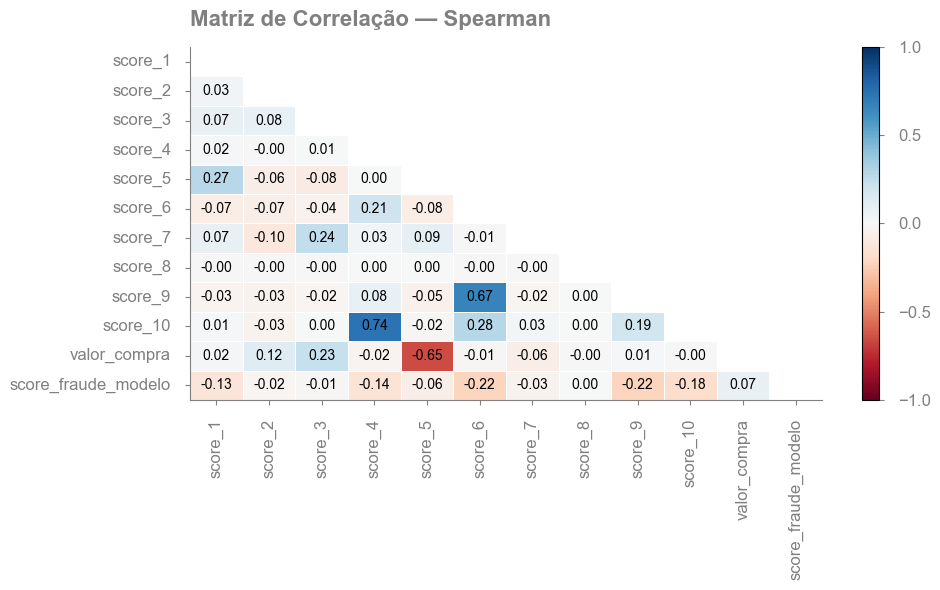

In [100]:
# Obter matriz de correlação
matrix = df.corr(method="spearman", numeric_only=True)

# Máscara para triângulo superior
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Figura e eixos
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white", layout="tight")

# Mapa de calor
sns.heatmap(
    matrix,
    mask=mask,
    annot=True,
    annot_kws={"size": 10, "fontname": "Arial", "color": "black"},
    cmap="RdBu",
    cbar=False,
    center=0,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    square=False,
    linewidths=0.5,
    ax=ax,
)

# Barra de cores
cbar = fig.colorbar(ax.collections[0], ticks=[-1, -0.5, 0, 0.5, 1])
cbar.ax.tick_params(colors="grey", pad=10, labelsize=12, labelcolor="grey")

# Título
ax.set_title(
    "Matriz de Correlação — Spearman",
    loc="left",
    pad=15,
    fontdict={"fontfamily": "Arial", "fontsize": 16, "weight": "bold"},
    color="grey",
)

# Rótulos dos eixos
ax.tick_params(axis="x", pad=10, colors="grey", labelsize=12, labelrotation=90)
ax.tick_params(axis="y", pad=10, colors="grey", labelsize=12, labelrotation=0)

# Bordas
ax.spines[["bottom", "left"]].set_visible(True)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/13-matriz-correlacoes-spearman.png",
    dpi="figure",
)

É fácil identificar, na figura acima, que apenas os pares (`score_4`, `score_10`), (`score_5`, `valor_compra`) e (`score_6`, `score_9`) apresentam associação monotônica forte. Os demais pares mostram associações fracas ou muito fracas.

No entanto, há **fatores estruturais** nos dados que podem explicar essas correlações elevadas:

* **`score_4` e `score_10`**: ambos possuem alta concentração em um único valor. O `score_4` apresenta 26% de seus valores iguais a 50, enquanto o `score_10` possui 11% de zeros (ver: ). Além disso, `score_4` varia entre 0 e 50, ou seja, possui poucos níveis distintos.

* **`score_5` e `valor_compra`**: o `score_5` é um caso ainda mais extremo, com 43% de seus valores iguais a zero.

* **`score_6` e `score_9`**: o `score_6` também apresenta 17% de zeros.

Essas características — como alta proporção de zeros e baixa variabilidade dos dados — geram **muitos empates no cálculo da correlação de Spearman**, que se baseia na ordenação (ranks) dos valores. O excesso de empates pode **inflar artificialmente** o coeficiente, sugerindo uma associação monotônica mais forte do que realmente existe.

De fato, ao plotarmos a dispersão desses pares, **não se observa uma relação monotônica aparente**, como mostrado na figura abaixo:

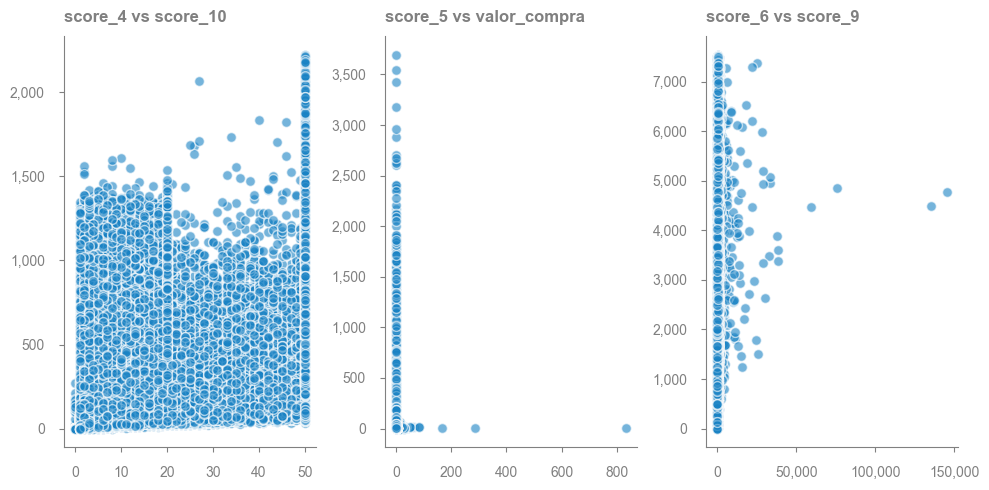

In [101]:
pares = [("score_4", "score_10"), ("score_5", "valor_compra"), ("score_6", "score_9")]

# Figura e eixos
fig, axs = plt.subplots(
    1, len(pares), figsize=(10, 5), facecolor="white", layout="tight"
)

# Plotar gráficos de dispersão para cada par de colunas
for ax, (x_col, y_col) in zip(axs, pares):

    # Diagrama de dispersão
    ax.scatter(
        df[x_col], df[y_col], s=50, color="#1982C4", edgecolor="white", alpha=0.6
    )

    # Formatar eixos
    ax.xaxis.set_major_formatter("{x:,.0f}")
    ax.yaxis.set_major_formatter("{x:,.0f}")
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    ax.tick_params(colors="grey", pad=10, labelsize=10, labelfontfamily="Arial")

    # Limpar bordas
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("grey")

    # Título
    ax.set_title(
        f"{x_col} vs {y_col}",
        loc="left",
        pad=10,
        fontname="Arial",
        fontsize=12,
        color="grey",
        weight="bold",
    )

# Exibindo o gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/14-scatterplots.png",
    dpi="figure",
)

*Nota: Embora a correlação de Pearson não tenha sido utilizada nesta etapa exploratória, ela deve ser considerada em fases posteriores de modelagem preditiva, especialmente quando há pressuposto de independência linear entre variáveis.*

<a id="532"></a>
#### 5.3.2. Comparações entre variáveis numéricas e *target* (fraude)

Como as variáveis numéricas se distribuem em cada grupo da variável-alvo (target) — "Não-Fraude" e "Fraude"? Para responder a essa pergunta, foram utilizados boxplots e estatísticas descritivas por grupo, permitindo observar possíveis diferenças na distribuição das variáveis entre os dois níveis do *target*.

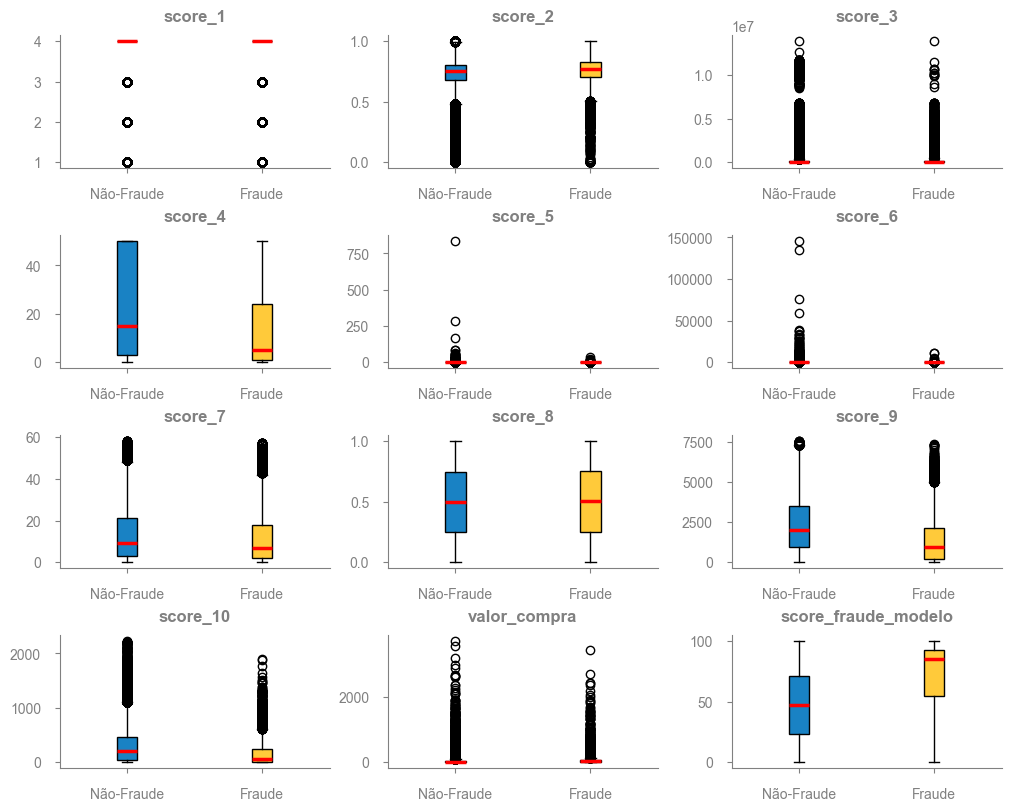

In [102]:
# Figura e eixos
fig, axs = plt.subplots(4, 3, figsize=(10, 8), facecolor="white", layout="constrained")

# Paleta de cores para as classes - Fraude e Não-fraude
colors = ["#1982C4", "#FFCA3A"]

# Iterar pelas colunas numéricas e subplots
for ax, col in zip(axs.flatten(), df.select_dtypes("number").columns):

    # Coletar valores por classe da variável target ("fraude")
    grupos = []
    for classe in df["fraude"].unique():
        grupo = df[df["fraude"] == classe][col].dropna()
        grupos.append(grupo)

    # Propriedades da mediana
    medianprops = dict(linestyle="-", linewidth=2.5, color="red")

    # Boxplot
    bplot = ax.boxplot(
        grupos,
        patch_artist=True,
        medianprops=medianprops,
        tick_labels=df["fraude"].unique(),
    )

    #  Formatar ticks
    ax.tick_params(colors="grey", pad=10, labelsize=10, labelfontfamily="Arial")
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")

    # Título do subplot
    ax.set_title(
        col,
        loc="center",
        pad=10,
        fontname="Arial",
        fontsize=12,
        color="grey",
        weight="bold",
    )

    # Bordas
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("grey")

    # Preencher caixas com cores
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/15-boxplots-va-numericas-vs-target.png",
    dpi="figure",
)

Embora a assimetria de algumas variáveis dificulte a análise visual dos boxplots, de modo geral, não se observam diferenças substanciais nas distribuições entre os grupos da variável `fraude`. A principal exceção é a variável `score_fraude_modelo`, cuja distribuição no grupo "Fraude" está mais concentrada em valores elevados — indicativos de maior probabilidade de fraude. 

Quanto às estatísticas descritivas, destacam-se os seguintes pontos:
* **A média e a mediana de `score_fraude_modelo` são consideravelmente maiores no grupo "Fraude"**, como era esperado. Isso indica que o modelo atual está, corretamente, atribuindo maior probabilidade de fraude aos pedidos efetivamente classificados como fraudulentos.

* **A média e a mediana de `valor_compra` também são mais elevadas no grupo "Fraude"**, o que corrobora a hipótese inicial de que transações com valores mais altos tendem a apresentar maior probabilidade de fraude (ver [seção 1.4.](#14)).

* **A média e a mediana de `score_6` são significativamente maiores no grupo "Não-Fraude"**, comportamento que não fica evidente nos boxplots devido à alta assimetria dessa variável — uma limitação comum na visualização de variáveis altamente assimétricas, o que também pode afetar outras variáveis do *dataset*.

In [103]:
# Estatísticas a serem calculadas
stats = ["count", "mean", "std", "median", "skew"]

# Colunas não numéricas ou não relevantes para a análise estatística
colunas_excluidas = [
    "pais",
    "produto",
    "categoria_produto",
    "entrega_doc_1",
    "entrega_doc_2",
    "entrega_doc_3",
    "data_compra",
    "mes",
]

# Selecionar apenas colunas numéricas relevantes
df_numericas = df.drop(columns=colunas_excluidas, errors="ignore")

# Agrupar por variável target ("fraude") e calcular estatísticas
resultado = df_numericas.groupby("fraude", observed=False).agg(stats).T  # type: ignore

# Exibir resultado
resultado

fraude                         Fraude  Não-Fraude
score_1             count     7500.00   142500.00
                    mean         3.51        3.72
                    std          0.93        0.74
                    median       4.00        4.00
                    skew        -1.57       -2.43
score_2             count     6671.00   130345.00
                    mean         0.75        0.73
                    std          0.15        0.13
                    median       0.77        0.75
                    skew        -1.66       -1.63
score_3             count     6671.00   130345.00
                    mean    384770.68   254082.18
                    std    1089891.13   831567.81
                    median   49068.52    43479.52
                    skew         4.67        6.90
score_4             count     7471.00   142164.00
                    mean        14.87       22.04
                    std         17.96       20.10
                    median       5.00       15.00
                    skew         1.07        0.39
score_5             count     7500.00   142500.00
                    mean         0.20        0.22
                    std          0.67        2.49
                    median       0.02        0.11
                    skew        25.74      275.65
score_6             count     7500.00   142489.00
                    mean        18.73       52.88
                    std        200.89      726.40
                    median       1.00        9.00
                    skew        45.09      123.69
score_7             count     7500.00   142500.00
                    mean        12.04       14.31
                    std         13.43       14.19
                    median       7.00        9.00
                    skew         1.42        1.19
score_8             count     7500.00   142500.00
                    mean         0.50        0.50
                    std          0.29        0.29
                    median       0.51        0.50
                    skew        -0.02        0.01
score_9             count     7500.00   142489.00
                    mean      1431.98     2351.38
                    std       1496.79     1710.67
                    median     956.50     1989.00
                    skew         1.26        0.66
score_10            count     7471.00   142164.00
                    mean       169.10      306.85
                    std        249.17      322.95
                    median      56.00      202.00
                    skew         2.11        1.35
valor_compra        count     7500.00   142500.00
                    mean        72.97       41.97
                    std        164.84       85.71
                    median      25.87       20.18
                    skew         7.26        9.62
score_fraude_modelo count     7500.00   142500.00
                    mean        69.90       46.92
                    std         32.08       28.36
                    median      85.00       47.00
                    skew        -1.04        0.04

<a id="533"></a>
#### 5.3.3. Comparações entre variáveis categóricas e *target* (fraude)

**As variáveis categóricas representaram um desafio adicional na EDA.** Dado que `pais` e `categoria_produto` possuem alta cardinalidade, tornou-se inviável utilizar recursos visuais para compará-las diretamente à variável-alvo (`fraude`). No entanto, como discutido na análise dos KPIs, as taxas de fraude variam entre os cinco países com maior volume de pedidos, sugerindo que o país de origem pode influenciar a probabilidade de fraude. O mesmo raciocínio se aplica às categorias de produto.

Dessa forma, neste tópico, optou-se por focar nas variáveis relacionadas à **entrega de documentos** (`entrega_doc_1`, `entrega_doc_2` e `entrega_doc_3`), comparando-as à variável `fraude` para examinar a distribuição conjunta e possíveis padrões entre a documentação entregue e a ocorrência de fraudes.

In [104]:
# Obter frequências absolutas e relativas para entrega de documentos
frequencias = {}
frequencias_relativas = {}

# Iterar sobre as colunas de entrega de documentos
for i in [1, 2, 3]:
    # Criar tabela de frequências absolutas
    tabela = pd.crosstab(
        df['fraude'],
        df[f'entrega_doc_{i}']
    )

    # Remover nome do índice
    tabela.index.name = None

    # Armazenar tabelas - frequências absolutas e relativas
    frequencias[f"tabela_{i}"] = tabela
    frequencias_relativas[f"tabela_{i}"] = tabela.div(tabela.sum(axis=0))

**Como já mencionado, a proporção geral de fraudes no conjunto de dados é de 5%.** Assim, sob a hipótese de independência entre as variáveis, esperaríamos que a proporção de fraudes nos grupos "Sim" e "Não" das variáveis de entrega de documentos — como `entrega_doc_1` — fosse próxima desse valor (ver [seção 6.3.1.](#631)).

No entanto, ao analisar as frequências apresentadas abaixo, observa-se que as proporções de fraudes variam consideravelmente entre os grupos. Esse comportamento sugere que pode haver algum grau de associação entre a entrega (ou não) dos documentos e a ocorrência de fraudes, o que reforça a relevância dessas variáveis na análise exploratória.

In [105]:
# Frequências absolutas
print("\nFrequência absoluta:\n")
for i in [1, 2, 3]:
    print(frequencias[f"tabela_{i}"])
    print("------------------------------------")


Frequência absoluta:

entrega_doc_1    Não     Sim
Fraude          2360    5140
Não-Fraude     12287  130213
------------------------------------
entrega_doc_2     Não    Sim
Fraude           5946   1554
Não-Fraude     119963  22537
------------------------------------
entrega_doc_3    Não    Sim
Fraude          5079   2421
Não-Fraude     61792  80708
------------------------------------


In [106]:
# Frequências relativas - porcentagem de pedidos com entrega de documentos
print("\nFrequência relativa - porcentagem de pedidos com entrega de documentos\n")
for i in [1, 2, 3]:
    print(frequencias_relativas[f"tabela_{i}"])
    print("------------------------------------")


Frequência relativa - porcentagem de pedidos com entrega de documentos

entrega_doc_1  Não  Sim
Fraude        0.16 0.04
Não-Fraude    0.84 0.96
------------------------------------
entrega_doc_2  Não  Sim
Fraude        0.05 0.06
Não-Fraude    0.95 0.94
------------------------------------
entrega_doc_3  Não  Sim
Fraude        0.08 0.03
Não-Fraude    0.92 0.97
------------------------------------


<a id="54"></a>
### 5.4. Matriz de nulidade

Para investigar a associação entre a ocorrência de valores nulos entre pares de variáveis, foram calculadas as **correlações de nulidade**, conforme o procedimento descrito a seguir:

* Selecionaram-se as colunas com ao menos um valor nulo;
* Foi criado um novo dataset binário, em que cada célula assume o valor 1 se o dado for nulo e 0 caso contrário;
* Calculou-se o **coeficiente de correlação de Pearson** entre essas colunas binárias.

Ao analisar a figura abaixo, observa-se que os pares (`score_2`, `score_3`), (`score_4`, `score_10`) e (`score_6`, `score_9`) apresentam **correlação perfeita (igual a 1)**, o que indica que **sempre que há um valor nulo em uma das variáveis, há também na outra**.

Uma possível explicação é que esses pares de variáveis estejam **relacionados conceitualmente**, isto é, podem representar **componentes derivados de uma mesma origem** ou **variáveis calculadas simultaneamente**, o que justificaria o padrão de ausência conjunta.

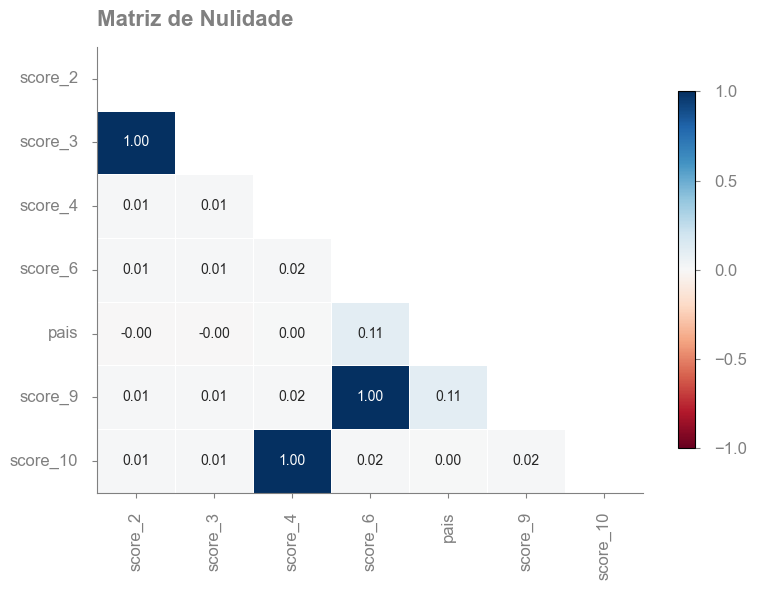

In [107]:
# Selecionar colunas com pelo menos 1 valor nulo
cols_na = df.columns[df.isna().any()]

# Matriz de correlação de nulidade
na_corr = df[cols_na].isna().corr()

# Máscara para triângulo superior
mask = np.triu(np.ones_like(na_corr, dtype=bool))

# Visualização
fig, ax = plt.subplots(figsize=(8, 6), facecolor="white", layout="tight")
sns.heatmap(
    na_corr,
    mask=mask,
    annot=True,
    cmap="RdBu",
    cbar=False,
    center=0,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    square=False,
    linewidths=0.5,
    ax=ax,
)

# Barra de cores
cbar = fig.colorbar(ax.collections[0], ticks=[-1, -0.5, 0, 0.5, 1], shrink=0.8)
cbar.ax.tick_params(colors="grey", pad=10, labelsize=12, labelcolor="grey")

# Título
ax.set_title(
    "Matriz de Nulidade",
    loc="left",
    pad=15,
    fontdict={"fontfamily": "Arial", "fontsize": 16, "weight": "bold"},
    color="grey",
)

# Rótulos dos eixos
ax.tick_params(axis="x", pad=10, colors="grey", labelsize=12, labelrotation=90)
ax.tick_params(axis="y", pad=10, colors="grey", labelsize=12, labelrotation=0)

# Bordas
ax.spines[["bottom", "left"]].set_visible(True)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/16-null-correlation.png",
    dpi="figure",
)

<a id="6"></a>
## 6. TESTES DE HIPÓTESES

Na [seção 1.4.](#14), foram formuladas quatro hipóteses iniciais para o projeto. Neste tópico, buscou-se verificar se essas hipóteses são consistentes com os dados observados, por meio de procedimentos estatísticos. Em essência, cada hipótese foi traduzida na comparação entre uma variável categórica e a variável-alvo `fraude`, utilizando testes de independência e testes de proporções, com *nível de significância fixado em 5%*.

A única exceção foi a 4ª hipótese — 'Algumas categorias de produtos são desproporcionalmente associadas a transações fraudulentas'. Devido à alta cardinalidade da variável `categoria_produto`, a análise ficou restrita aos KPIs e à descrição exploratória apresentados anteriormente.

Para evitar repetição de código, foi criado o módulo `testes.py`, que reúne as funções utilizadas para realização dos testes estatísticos. As bibliotecas `scipy` e `statsmodels` foram empregadas na implementação das funções.

É importante ressaltar que os dados analisados correspondem a uma **amostra**, e não à totalidade das transações. Por esse motivo, assumiu-se que a amostra é *aleatória*, *não enviesada* e *representativa* da população de interesse — ou seja, o conjunto completo de transações (ver [seção 3.1.](#31)).

<a id="61"></a>

### 6.1. Valor das transações vs. Fraude

Neste tópico, a hipótese avaliada foi: *“Transações com valores elevados apresentam maior probabilidade de serem fraudulentas.”*

Como `valor_compra` é uma variável contínua e `fraude` é binária, o caminho natural seria testar se a média de `valor_compra` no grupo "Fraude" é maior do que no grupo "Não-Fraude". No entanto, devido à forte assimetria de `valor_compra` e ao grande tamanho amostral, optou-se por discretizar `valor_compra` em duas categorias — *“Alto”* e *“Baixo”* — e comparar essa nova variável categórica com `fraude`. A decisão foi motivada pelos seguintes fatores:

* A alta assimetria de `valor_compra` viola a suposição de normalidade exigida pelo teste t para comparação de médias;
* O elevado tamanho da amostra inviabiliza o uso prático do teste **Mann-Whitney U**, cujo custo computacional é alto devido à natureza recursiva de seu cálculo;
* Além disso, os resultados do **Mann-Whitney U** tenderiam a ser de interpretação menos intuitiva no contexto do estudo.

Dessa forma, foram realizados **testes de independência** e **testes de proporções** para examinar a associação entre as variáveis `valor` (categorizada) e `fraude`.

<a id="611"></a>
#### 6.1.1. Teste de independência entre valor da compra e fraude

Para investigar se há associação entre o valor da compra (categorizado em *“Alto”* e *“Baixo”*) e a ocorrência de fraude, utilizou-se o **teste de independência qui-quadrado**.

Nesse teste, comparamos as frequências observadas em cada combinação de categorias com as frequências esperadas sob a suposição de independência entre as variáveis. A estatística de teste é dada por:

$$
TS = \sum_{i=1}^{r} \sum_{j=1}^{s} \frac{(N_{ij} - \hat{e}_{ij})^2}{\hat{e}_{ij}}
$$

onde:

* $N_{ij}$ é o número de elementos da amostra com a característica $i$ da variável $X$ (ex: valor) e a característica $j$ da variável $Y$ (ex: fraude);
* $N_i$ é o total de elementos com a característica $i$ da variável $X$;
* $M_j$ é o total de elementos com a característica $j$ da variável $Y$;
* $\hat{e}_{ij}$ é a **frequência esperada**, dada por:

$$
\hat{e}_{ij} = \frac{N_i M_j}{n}
$$

com $n$ sendo o tamanho total da amostra.

Sob a **hipótese nula de independência** entre as variáveis, a estatística $TS$ segue aproximadamente uma distribuição qui-quadrado com $(r - 1)(s - 1)$ graus de liberdade, onde $r$ e $s$ são os números de categorias de cada variável (Ross, 2020, p. 510). 

In [108]:
# Criar coluna categórica para o valor da compra
df["valor"] = np.where(
    df["valor_compra"] >= df["valor_compra"].quantile(0.75), "Alto", "Baixo"
)

In [109]:
# Criar tabela para contar fraudes por valor - "Alto" ou "Baixo"
data = pd.crosstab(
    df['fraude'],
    df['valor']
)

data

valor,Alto,Baixo
fraude,,
Fraude,2539,4961
Não-Fraude,34961,107539


In [110]:
ts.qui2(data, 0.05)

Qui-quadrado: 330.02741520467833
Valor crítico: 3.841458820694124
P-valor: 9.480173603777507e-74
Rejeitar a hipótese nula


Visto que o p-valor obtido é extremamente pequeno, **rejeita-se a hipótese nula de independência** para qualquer nível de significância razoável. Em outras palavras, **os dados fornecem evidências de que existe associação entre `valor` e `fraude`**.

Confirmada essa associação, o próximo passo é verificar **se a proporção de fraudes é maior entre os pedidos classificados como "Alto" valor de compra**.

<a id="612"></a>
#### 6.1.2. Comparação das proporções de fraude: valor alto vs. valor baixo

Para verificar se a proporção de fraudes é maior entre as transações de valor elevado, foi testada a seguinte hipótese nula:

$$
H_0: \; p_{\text{Alto}} \le p_{\text{Baixo}}
$$

contra a hipótese alternativa:

$$
H_1: \; p_{\text{Alto}} > p_{\text{Baixo}}
$$

onde:

* $p_{\text{Alto}}$ = proporção de fraudes no grupo com valor de compra **alto**
* $p_{\text{Baixo}}$ = proporção de fraudes no grupo com valor de compra **baixo**

Para esse teste, duas abordagens são comuns: (1) o **teste exato de Fisher-Irwin**, e (2) o **teste z para duas proporções**, baseado na aproximação normal da distribuição binomial (Ross, 2020, p. 342-345).
Dado o tamanho amostral elevado, optou-se pela segunda abordagem.

---

A estatística de teste do **teste z para comparação de duas proporções** é dada por:

$$
z = \frac{\hat{p}_1 - \hat{p}_2}{SE}
$$

onde:

$$
SE = \sqrt{p_{\text{combinado}} \cdot (1 - p_{\text{combinado}}) \cdot \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}
$$

e a **proporção combinada** ($p_{\text{combinado}}$) é calculada como:

$$
p_{\text{combinado}} = \frac{x_1 + x_2}{n_1 + n_2}
$$

com:

* $x_1$ e $x_2$ sendo o número de sucessos (fraudes) observados nos dois grupos;
* $n_1$ e $n_2$, os respectivos tamanhos amostrais dos grupos.

In [111]:
# Calcular proporção de fraudes em cada categoria de valor
data.div(data.sum(axis=0))

valor,Alto,Baixo
fraude,,
Fraude,0.07,0.04
Não-Fraude,0.93,0.96


In [112]:
# Frequencias absolutas de fraudes por valor - "Alto" ou "Baixo"
count = data.loc["Fraude"].values  

# Total de pedidos por valor
nobs = data.sum(axis=0).values  

# Teste de proporções para verificar se a taxa de fraudes é maior em pedidos de valor alto
ts.proporcoes_norm(
    count, nobs, 0.05, "larger"
) 

z-score: 18.166656687587796
p-value: 4.7400868018884794e-74
Rejeitar a hipótese nula


Novamente, o p-valor obtido é extremamente pequeno, o que leva à **rejeição da hipótese nula em favor da hipótese alternativa**. Assim, os dados sugerem que a **proporção de fraudes é significativamente maior entre os pedidos de valor alto**.

Com base nesse teste e na metodologia adotada, conclui-se que a **primeira hipótese inicial** — *“Transações com valores elevados apresentam maior probabilidade de serem fraudulentas.”* — **não é inconsistente com os dados amostrais**.

<a id="62"></a>
### 6.2. Região vs. Fraude

Neste tópico, a hipótese avaliada foi: *“Transações originadas em regiões geográficas incomuns estão mais propensas à fraude.”*

Observou-se que apenas dois países — Brasil (BR) e Argentina (AR) — concentram cerca de 96% dos pedidos ([seção 4.4.2.](#442)). Diante desse forte desbalanceamento, optou-se por criar a variável categórica `regiao`, classificando esses dois países como "Comuns" e os demais como "Incomuns".

Essa transformação se justifica pela elevada cardinalidade da variável `pais`, que torna inviável a aplicação direta de testes estatísticos em sua forma original.

Os procedimentos adotados são análogos aos do tópico anterior, com a aplicação de **testes de independência** e **testes de proporções** para avaliar a associação entre `regiao` e `fraude`.

<a id="621"></a>
#### 6.2.1. Teste de independência entre região e fraude

In [113]:
# Coluna categórica para região - "Comum" ou "Incomum"
df["regiao"] = np.where(
    df["pais"].isin(['BR', 'AR']), "Comum", "Incomum"
)

# Criar tabela dinâmica para contar fraudes por região
data = pd.crosstab(
    df['fraude'],
    df['regiao']
)

data

regiao,Comum,Incomum
fraude,,
Fraude,7341,159
Não-Fraude,136251,6249


Conforme apresentado abaixo, o p-valor obtido é extremamente pequeno, o que permite rejeitar a hipótese nula de independência entre as variáveis para qualquer nível de significância razoável. Em outras palavras, **os dados fornecem evidências de associação entre `regiao` e `fraude`**.

In [114]:
ts.qui2(data, 0.05)

Qui-quadrado: 89.40297331696651
Valor crítico: 3.841458820694124
P-valor: 3.2205219222399937e-21
Rejeitar a hipótese nula


<a id="622"></a>
#### 6.2.2. Comparação das proporções de fraude: regiões comuns vs. regiões incomuns

Para verificar se a proporção de fraudes é maior nas regiões incomuns, foi testada a seguinte hipótese nula:

$$
H_0: \; p_{I} \le p_{C}
$$

contra a hipótese alternativa:

$$
H_1: \; p_{I} > p_{C}
$$

onde:

* $p_{I}$ = proporção de fraudes nas regiões *incomuns*
* $p_{C}$ = proporção de fraudes nas regiões *comuns*

In [115]:
# Calcular proporção de fraudes em cada região - "Comum" ou "Incomum"
data.div(data.sum(axis=0))

regiao,Comum,Incomum
fraude,,
Fraude,0.05,0.02
Não-Fraude,0.95,0.98


O teste aponta para a **não rejeição da hipótese nula**, sugerindo que a proporção de fraudes nas regiões incomuns **não é maior** do que nas regiões comuns. Na verdade, como mostrado na [seção 4.4.3.](#443), a taxa de fraudes no Brasil (BR) — a região mais comum — é consideravelmente elevada, o que está em conformidade com o resultado do teste.

Assim, **com base na metodologia adotada e nos dados disponíveis**, não é possível afirmar que a taxa de fraudes é maior nas regiões incomuns.

In [116]:
# Frequências absolutas de fraudes por região - "Comum" ou "Incomum"
count = data.loc["Fraude"].values 

# Total de pedidos por região - "Comum" ou "Incomum"
nobs = data.sum(axis=0).values

# Performar teste de proporções para verificar se a taxa de fraudes é maior na região "Incomum"
ts.proporcoes_norm(count, nobs, 0.05 ,"smaller")

z-score: 9.455314554099537
p-value: 1.0
Não rejeitar a hipótese nula


<a id="63"></a>
### 6.3. Documentação vs. Fraude

Neste tópico, a hipótese avaliada foi: *“Transações associadas a documentação incompleta apresentam maior chance de serem fraudulentas.”*

Para investigá-la, foram realizados testes de independência e testes de proporções entre a variável-alvo `fraude` e as variáveis categóricas `entrega_doc_1`, `entrega_doc_2` e `entrega_doc_3`, que indicam o recebimento (ou não) da documentação exigida.

<a id="631"></a>
#### 6.3.1. Teste de independência entre documentação e fraude

Para todos os pares entre entrega de documentos e `fraude`, rejeita-se a hipótese nula de independência. Em outras palavras, os dados fornecem evidências de que existe associação entre as variáveis de entrega de documentos e a ocorrência de fraude.

In [117]:
# Teste qui-quadrado para entrega de documentos
for i in [1, 2, 3]:
    print(f"entrega_doc_{i}")
    print("------------------------------------")
    ts.qui2(frequencias[f"tabela_{i}"], 0.05)
    print("------------------------------------ \n")

entrega_doc_1
------------------------------------
Qui-quadrado: 4219.90940004285
Valor crítico: 3.841458820694124
P-valor: 0.0
Rejeitar a hipótese nula
------------------------------------ 

entrega_doc_2
------------------------------------
Qui-quadrado: 127.13236812000072
Valor crítico: 3.841458820694124
P-valor: 1.7378714352151478e-29
Rejeitar a hipótese nula
------------------------------------ 

entrega_doc_3
------------------------------------
Qui-quadrado: 1710.927027735605
Valor crítico: 3.841458820694124
P-valor: 0.0
Rejeitar a hipótese nula
------------------------------------ 



<a id="632"></a>
#### 6.3.2. Comparação das proporções de fraude: documentação completa vs. incompleta

Para verificar se a proporção de fraudes é maior entre os pedidos com documentação não entregue, foi testada a seguinte hipótese nula:

$$
H_0: \; p_{N} \le p_{S}
$$

contra a hipótese alternativa:

$$
H_1: \; p_{N} > p_{S}
$$

onde:

* $p_{N}$ = proporção de fraudes nos pedidos com documentação não entregue - *Não*
* $p_{S}$ = proporção de fraudes nas regiões com documentação não entregue - *Sim*

In [118]:
# Frequências relativas - porcentagem de pedidos com entrega de documentos
print("\nFrequência relativa - porcentagem de pedidos com entrega de documentos\n")
for i in [1, 2, 3]:
    print(frequencias_relativas[f"tabela_{i}"])
    print("------------------------------------")


Frequência relativa - porcentagem de pedidos com entrega de documentos

entrega_doc_1  Não  Sim
Fraude        0.16 0.04
Não-Fraude    0.84 0.96
------------------------------------
entrega_doc_2  Não  Sim
Fraude        0.05 0.06
Não-Fraude    0.95 0.94
------------------------------------
entrega_doc_3  Não  Sim
Fraude        0.08 0.03
Não-Fraude    0.92 0.97
------------------------------------


Para os pares (`entrega_doc_1`, `fraude`) e (`entrega_doc_3`, `fraude`), rejeita-se a hipótese nula em favor da hipótese alternativa. Em outras palavras, **há evidências** de que a proporção de fraudes é maior no grupo que **não** entregou os respectivos documentos.

Já para o par (`entrega_doc_2`, `fraude`), o resultado foi distinto: não se rejeita a hipótese nula, o que sugere que a proporção de fraudes no grupo "Não" é menor do que no grupo "Sim".

In [119]:
# Teste de proporções para entrega de documentos
for i in [1, 2, 3]:
    # Frequências absolutas de fraudes por entrega de documentos - "Não" ou "Sim"
    count = frequencias[f"tabela_{i}"].loc["Fraude"].values  # Não, Sim
    
    # Total de pedidos por entrega de documentos - "Não" ou "Sim"
    nobs = frequencias[f"tabela_{i}"].sum(axis=0).values
    
    # Performar teste de proporções para verificar se a taxa de fraudes é maior quando não há entrega de documentos
    print(f"entrega_doc_{i}")
    print("------------------------------------")
    ts.proporcoes_norm(count, nobs, 0.05, "larger")
    print("------------------------------------ \n")

entrega_doc_1
------------------------------------
z-score: 64.96082973641
p-value: 0.0
Rejeitar a hipótese nula
------------------------------------ 

entrega_doc_2
------------------------------------
z-score: -11.275299025746534
p-value: 1.0
Não rejeitar a hipótese nula
------------------------------------ 

entrega_doc_3
------------------------------------
z-score: 41.36335368095297
p-value: 0.0
Rejeitar a hipótese nula
------------------------------------ 



<a id="7"></a>
## 7. CONSIDERAÇÕES FINAIS

Neste projeto, buscou-se identificar e analisar os *principais fatores associados à ocorrência de transações fraudulentas*, com o objetivo de traçar um *perfil característico dessas fraudes*. Inicialmente, analisaram-se KPIs de fraude, construídos para responder a perguntas relacionadas à performance do negócio. Em seguida, com o apoio de ferramentas visuais e estatísticas descritivas, foi realizada uma análise exploratória dos dados (EDA), visando examinar e caracterizar o conjunto de dados disponível. Por fim, conduziram-se testes de hipóteses para verificar se as suposições iniciais eram consistentes com os dados observados. 

**Dentre os resultados encontrados, destacam-se:**

* Os lucros estão diretamente ligados ao controle de fraudes. Aumentos ou quedas substanciais nas taxas de fraude ao longo do período analisado estão associados, respectivamente, a quedas ou aumentos nos lucros ([seção 4.2.3](#423));
* De forma semelhante, oscilações no valor médio das transações — fraudulentas ou legítimas — influenciaram diretamente os resultados financeiros, afetando lucros e prejuízos ([seção 4.2.4.](#424));
* No agregado mensal, o lucro foi consideravelmente menor em abril, em comparação com o mês anterior, devido a uma queda expressiva nas receitas ([seção 4.3.3.](#433));
* O Brasil (BR) concentra 74% dos pedidos. No entanto, o resultado acumulado do país é negativo, devido à alta taxa de fraudes e ao maior valor médio das transações fraudulentas, em comparação com outros países ([seções 4.4.2.](#442), [4.4.3.](#443) e [4.4.4.](#444));
* As categorias de produtos com maior receita apresentaram os piores resultados, em razão da elevada taxa de fraudes e do alto valor médio dessas transações fraudulentas ([seções 4.5.2.](#452), [4.5.3.](#453) e [4.5.4.](#454));
* Transações com valores elevados parecem ter maior probabilidade de serem fraudulentas ([seção 6.1.2.](#612));
* Não foi possível afirmar que a taxa de fraudes seja maior em regiões incomuns ([seção 6.2.2.](#622));
* Para as variáveis `entrega_doc_1` e `entrega_doc_3`, há evidências de que a taxa de fraudes é maior quando **não** há entrega de documentos. Já para `entrega_doc_2`, o resultado foi distinto: a proporção de fraudes é menor quando **não** há entrega de documentos ([seção 6.3.2.](#632)).

**Algumas observações importantes sobre a análise:**

* O período considerado é curto, o que limita a robustez de conclusões sobre padrões temporais ou comportamentos sazonais;
* A discretização realizada em `valor_compra` ([seção 6.1.](#61)) e a agregação de países em grupos ([seção 6.2.](#62)) implicam perda de informação, o que reduz a precisão dos testes estatísticos;
* A ausência de informações mais detalhadas sobre os scores (`score_1` a `score_10`) limita a análise dessas variáveis. Não é possível interpretá-los com segurança nem identificar potenciais outliers ou erros.

**Por fim**, destaca-se que as hipóteses iniciais também poderiam ser investigadas por meio de modelos de classificação, como a **regressão logística**, com base nos coeficientes estimados. Futuras versões deste projeto podem adotar essa abordagem para aprofundar a análise e testar a robustez dos achados exploratórios.

<a id="ref"></a>
## REFERÊNCIAS

Van Vlasselaer, V., Eliassi-Rad, T., Akoglu, L., Snoeck, M., & Baesens, B. (2017). Gotcha! network-based fraud detection for social security fraud. Management Science, 63(9), 3090-3110.

Ross, S. M. (2020). Introduction to Probability and Statistics for Engineers and Scientists. United Kingdom: Academic Press.